In [1]:
import numpy as np 
import pandas as pd
import seaborn  as sns            # plots
import matplotlib.pyplot as plt   # plots
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
symbols     = ["SUMAS.IS", "LBS=F","ORMA.IS", "YONGA.IS","XU100.IS",
               "XU030.IS","EURTRY=X","TRY=X","XKAGT.IS","XU050"]
#  time period and interval
yf_period   = "2y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max --8y
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo  --1d

In [3]:
# ekstra ekleme icin ornek
# symbols.append('NEM')

In [4]:
#  set parameters to download
stock_parameters = ["shortName", "quoteType", "exchange",  "marketCap", "volume", "averageVolume", "fiftyTwoWeekLow", "fiftyTwoWeekHigh"]

#  create dataframe
yf_info = pd.DataFrame(index = stock_parameters, columns = symbols)

for i in symbols:
    l = []             # initialize
    x = yf.Ticker(i)   # get ticker info
    for j in stock_parameters:
        if 'date' in j.lower():
            d = pd.to_datetime(x.info[j])
            if d is not None:
                l.append(d.strftime("%Y-%m-%d"))  # format date
        else:
            try:      # some parameters error
                l.append(x.info[j])
            except:   # ignore error and continue
                l.append("")
    yf_info[i] = l
    print('{}\t- financial information downloaded'.format(i))


yf_info

SUMAS.IS	- financial information downloaded
LBS=F	- financial information downloaded
ORMA.IS	- financial information downloaded
YONGA.IS	- financial information downloaded
XU100.IS	- financial information downloaded
XU030.IS	- financial information downloaded
EURTRY=X	- financial information downloaded
TRY=X	- financial information downloaded
XKAGT.IS	- financial information downloaded
XU050	- financial information downloaded


,SUMAS.IS,LBS=F,ORMA.IS,YONGA.IS,XU100.IS,XU030.IS,EURTRY=X,TRY=X,XKAGT.IS,XU050
shortName,SUMAS SUNI TAHTA,Lumber Nov 22,ORMA ORMAN MAHSULLERI,YONGA MOBILYA,BIST 100,BIST 30,EUR/TRY,USD/TRY,BIST ORMAN KAGIT BASIM,
quoteType,EQUITY,FUTURE,EQUITY,EQUITY,INDEX,INDEX,CURRENCY,CURRENCY,INDEX,
exchange,IST,CME,IST,IST,IST,IST,CCY,CCY,IST,
marketCap,470564640,None,973760000,396609600,None,None,None,None,None,
volume,2537,366,4520,14138,0,0,0,0,0,
averageVolume,4662,211,15289,13569,4178238561,2644210,0,0,None,
fiftyTwoWeekLow,60,470.6,24.02,17.5,1371.5,1466.9,9.93198,8.4261,2804.19,
fiftyTwoWeekHigh,103.4,1477.4,41,31.5,3715.3,4115.6,20.733,18.3523,2856.6,


In [5]:
yf_price = yf.download(
        tickers = symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by interval
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy

# Select 'Close' (price at market close) column only
yf_price = yf_price.iloc[:, yf_price.columns.get_level_values(1) == 'Close']
yf_price = round(yf_price[symbols],2)   # change order of columns

# Remove the dataframe multi-index
yf_price.columns = yf_price.columns.droplevel(1)   


yf_price.head(10)

[*********************100%***********************]  10 of 10 completed

1 Failed download:
- XU050: No data found, symbol may be delisted


,SUMAS.IS,LBS=F,ORMA.IS,YONGA.IS,XU100.IS,XU030.IS,EURTRY=X,TRY=X,XKAGT.IS,XU050
Date,,,,,,,,,,
2020-09-15,28.84,920.0,10.40,72.25,1111.2,1241.8,8.88,7.48,NaN,NaN
2020-09-16,31.72,612.0,10.44,79.48,1107.1,1236.1,8.87,7.49,NaN,NaN
2020-09-17,34.89,597.6,9.66,71.57,1110.7,1240.8,8.84,7.49,NaN,NaN
2020-09-18,38.20,578.6,9.92,64.44,1112.0,1240.0,8.94,7.54,NaN,NaN
2020-09-21,42.19,549.6,9.77,58.00,1087.0,1213.2,8.95,7.56,NaN,NaN
2020-09-22,38.01,578.6,10.53,52.24,1096.2,1224.2,8.96,7.62,NaN,NaN
2020-09-23,34.20,607.6,11.58,47.02,1102.7,1231.7,8.98,7.67,NaN,NaN
2020-09-24,37.61,578.6,11.00,51.70,1119.6,1256.7,8.96,7.70,NaN,NaN
2020-09-25,41.37,607.6,10.70,46.54,1124.2,1262.5,8.89,7.62,NaN,NaN


In [6]:
print('shape: ', yf_price.shape)

shape:  (523, 10)


In [7]:
df = yf_price.reset_index().copy()
df

,Date,SUMAS.IS,LBS=F,ORMA.IS,YONGA.IS,XU100.IS,XU030.IS,EURTRY=X,TRY=X,XKAGT.IS,XU050
0,2020-09-15,28.84,920.0,10.40,72.25,1111.20,1241.80,8.88,7.48,NaN,NaN
1,2020-09-16,31.72,612.0,10.44,79.48,1107.10,1236.10,8.87,7.49,NaN,NaN
2,2020-09-17,34.89,597.6,9.66,71.57,1110.70,1240.80,8.84,7.49,NaN,NaN
3,2020-09-18,38.20,578.6,9.92,64.44,1112.00,1240.00,8.94,7.54,NaN,NaN
4,2020-09-21,42.19,549.6,9.77,58.00,1087.00,1213.20,8.95,7.56,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
518,2022-09-09,74.90,509.0,36.54,26.08,3521.40,3866.10,18.26,18.24,NaN,NaN
519,2022-09-12,76.00,554.9,37.88,28.68,3649.20,4025.10,18.33,18.22,NaN,NaN
520,2022-09-13,76.00,560.0,37.90,28.00,3426.90,3748.00,18.45,18.22,NaN,NaN
521,2022-09-14,73.00,511.0,36.50,29.90,3447.00,3767.10,18.20,18.25,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [11]:
sumas = df[["Date","SUMAS.IS"]]
orma = df[["Date","ORMA.IS"]]
smor = sumas.merge(orma, how="left",on=['Date']).dropna()
smor['orma'] = smor['ORMA.IS']
smor

,Date,SUMAS.IS,ORMA.IS,orma
0,2020-09-15,28.84,10.40,10.40
1,2020-09-16,31.72,10.44,10.44
2,2020-09-17,34.89,9.66,9.66
3,2020-09-18,38.20,9.92,9.92
4,2020-09-21,42.19,9.77,9.77
...,...,...,...,...
518,2022-09-09,74.90,36.54,36.54
519,2022-09-12,76.00,37.88,37.88
520,2022-09-13,76.00,37.90,37.90
521,2022-09-14,73.00,36.50,36.50


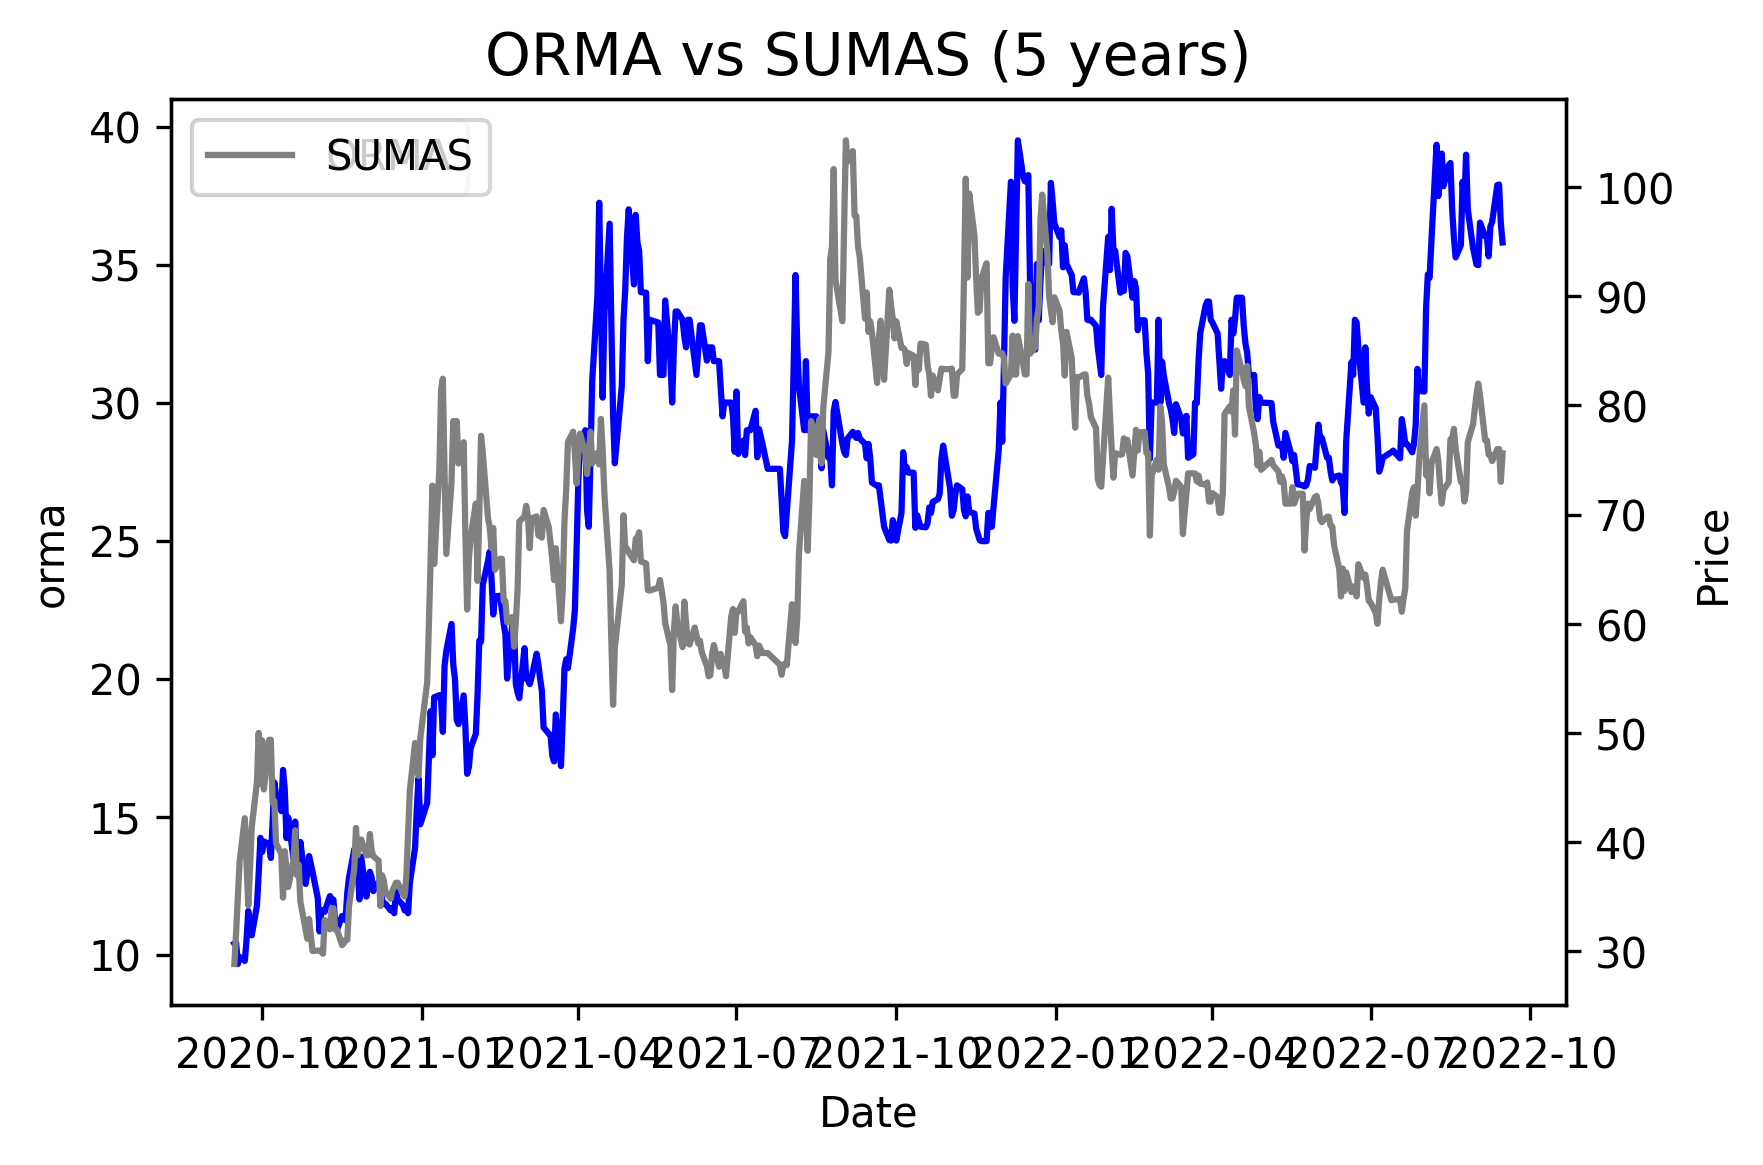

In [12]:
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
l1 = sns.lineplot(x = smor['Date'], y = smor['orma'], color='blue',label = "ORMA")
ax2 = plt.twinx()
l2 = sns.lineplot(x = smor['Date'], y = smor['SUMAS.IS'], color='gray',label = 'SUMAS')
plt.legend(['SUMAS','ORMA'],loc=2)  # top left
plt.title('ORMA vs SUMAS (5 years)', fontsize=14)
plt.xlabel('')
plt.ylabel('Price')      
plt.show()

In [13]:
bg_m = smor.resample('M', on='Date').mean()
bg_m["S_mreturn"] = (bg_m["SUMAS.IS"] / 
                              bg_m.shift(1)["SUMAS.IS"]
                              - 1)
bg_m["O_mreturn"] = (bg_m["orma"] / 
                              bg_m.shift(1)["orma"]
                              - 1)
bg_m = bg_m.dropna()
bg_m.head(5)

,SUMAS.IS,ORMA.IS,orma,S_mreturn,O_mreturn
Date,,,,,
2020-10-31,39.120952,14.287619,14.287619,0.003466,0.289690
2020-11-30,33.841905,12.017143,12.017143,-0.134942,-0.158912
2020-12-31,39.195217,12.608261,12.608261,0.158186,0.049190
2021-01-31,70.965000,18.691500,18.691500,0.810553,0.482480
2021-02-28,66.220500,21.649000,21.649000,-0.066857,0.158227


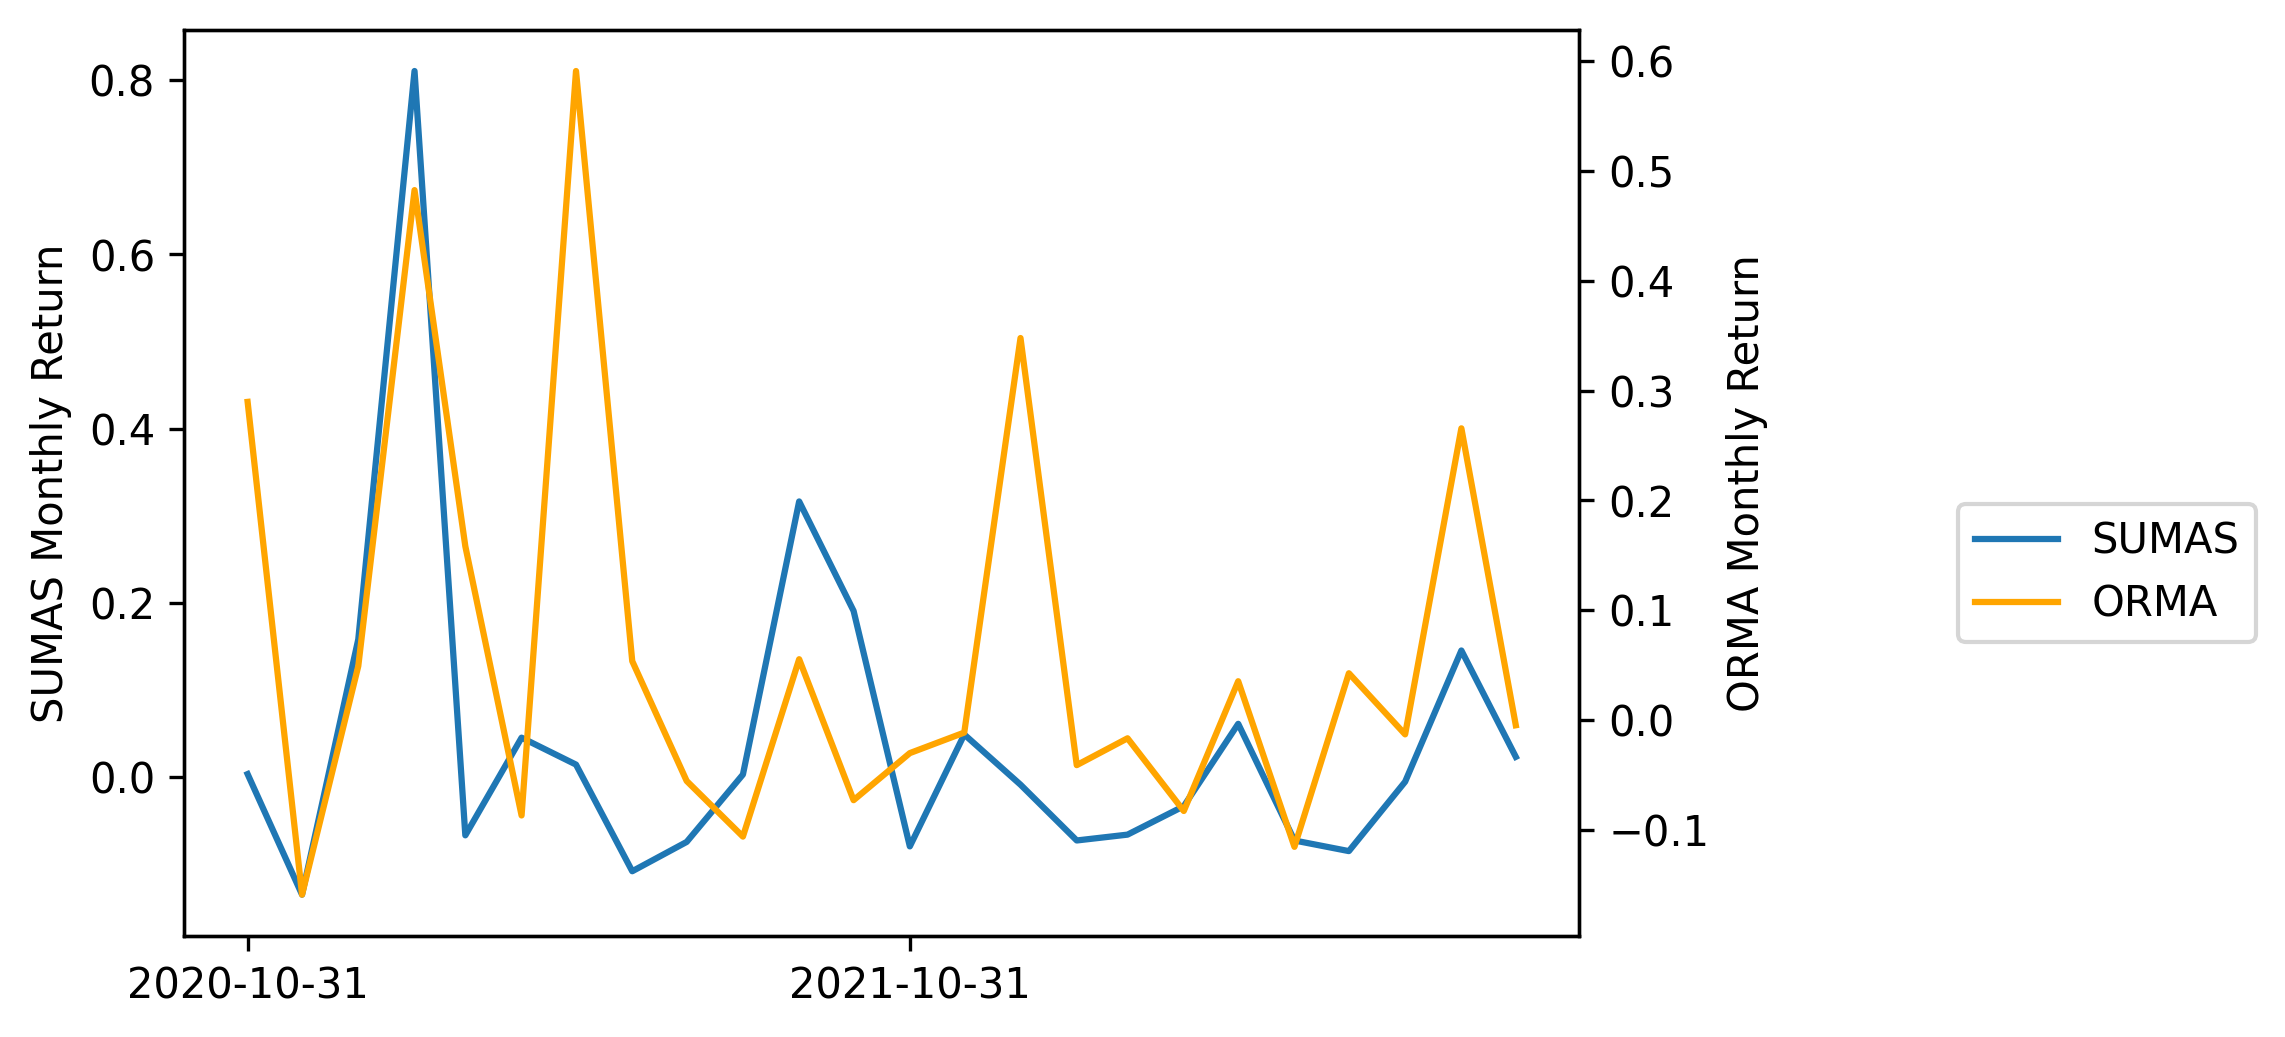

In [14]:
dates = bg_m.index.to_numpy()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(dates,bg_m["S_mreturn"])
curve2 = ax2.plot(dates,bg_m["O_mreturn"],color="orange")

plt.xticks(dates[::12])
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
ax1.set_ylabel('SUMAS Monthly Return')
ax2.set_ylabel('ORMA Monthly Return')
ax1.legend([ax1.get_lines()[0], ax2.get_lines()[0]],\
           ['SUMAS','ORMA'], bbox_to_anchor=(1.5, 0.5))
plt.show()

In [15]:
cmdata = bg_m[["S_mreturn","O_mreturn"]]
cmdata.head(5)

,S_mreturn,O_mreturn
Date,,
2020-10-31,0.003466,0.289690
2020-11-30,-0.134942,-0.158912
2020-12-31,0.158186,0.049190
2021-01-31,0.810553,0.482480
2021-02-28,-0.066857,0.158227


In [16]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests

grangercausalitytests(cmdata,5,addconst=True,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4188  , p=0.1356  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=2.7817  , p=0.0953  , df=1
likelihood ratio test: chi2=2.6259  , p=0.1051  , df=1
parameter F test:         F=2.4188  , p=0.1356  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0117  , p=0.3845  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=2.6186  , p=0.2700  , df=2
likelihood ratio test: chi2=2.4741  , p=0.2902  , df=2
parameter F test:         F=1.0117  , p=0.3845  , df_denom=17, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0223  , p=0.4125  , df_denom=14, df_num=3
ssr based chi2 test:   chi2=4.6004  , p=0.2035  , df=3
likelihood ratio test: chi2=4.1598  , p=0.2447  , df=3
parameter F test:         F=1.0223  , p=0.4125  , df_denom=14, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9503  , p=0.1721  , df_d

{1: ({'ssr_ftest': (2.418833687023543, 0.13556683221789273, 20.0, 1),
   'ssr_chi2test': (2.781658740077075, 0.09534936967972912, 1),
   'lrtest': (2.625889797735965, 0.10513355403541368, 1),
   'params_ftest': (2.4188336870235405, 0.13556683221789315, 20.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0117315461566603, 0.3844628671137634, 17.0, 2),
   'ssr_chi2test': (2.618599295934885, 0.2700090915974716, 2),
   'lrtest': (2.4741150025747487, 0.2902369846449654, 2),
   'params_ftest': (1.0117315461566632, 0.38446286711376215, 17.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0223104299124637, 0.4124658710201568, 14.0, 3),
   'ssr_chi2test': (4.600396934606086, 0.2035080332636016, 3),
   'lrtest': (4.159793796898711, 0.24471824275920911, 3),
   'params_ftest': (1.0223104299124615, 0.41246587102015825, 14.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [17]:
bg_w = smor.resample('W', on='Date').mean()
bg_w

,SUMAS.IS,ORMA.IS,orma
Date,,,
2020-09-20,33.4125,10.105,10.105
2020-09-27,38.6760,10.716,10.716
2020-10-04,46.9900,13.352,13.352
2020-10-11,45.2100,14.864,14.864
2020-10-18,37.2780,15.414,15.414
...,...,...,...
2022-08-21,76.1100,37.104,37.104
2022-08-28,73.1900,37.372,37.372
2022-09-04,80.5500,35.525,35.525


In [18]:
bg_w["S_mreturn"] = (bg_w["SUMAS.IS"] / 
                              bg_w.shift(1)["SUMAS.IS"]
                              - 1)
bg_w["O_mreturn"] = (bg_w["orma"] / 
                              bg_w.shift(1)["orma"]
                              - 1)
bg_w = bg_w.dropna()
bg_w.head(5)

,SUMAS.IS,ORMA.IS,orma,S_mreturn,O_mreturn
Date,,,,,
2020-09-27,38.676,10.716,10.716,0.157531,0.060465
2020-10-04,46.990,13.352,13.352,0.214965,0.245987
2020-10-11,45.210,14.864,14.864,-0.037880,0.113241
2020-10-18,37.278,15.414,15.414,-0.175448,0.037002
2020-10-25,37.760,13.744,13.744,0.012930,-0.108343


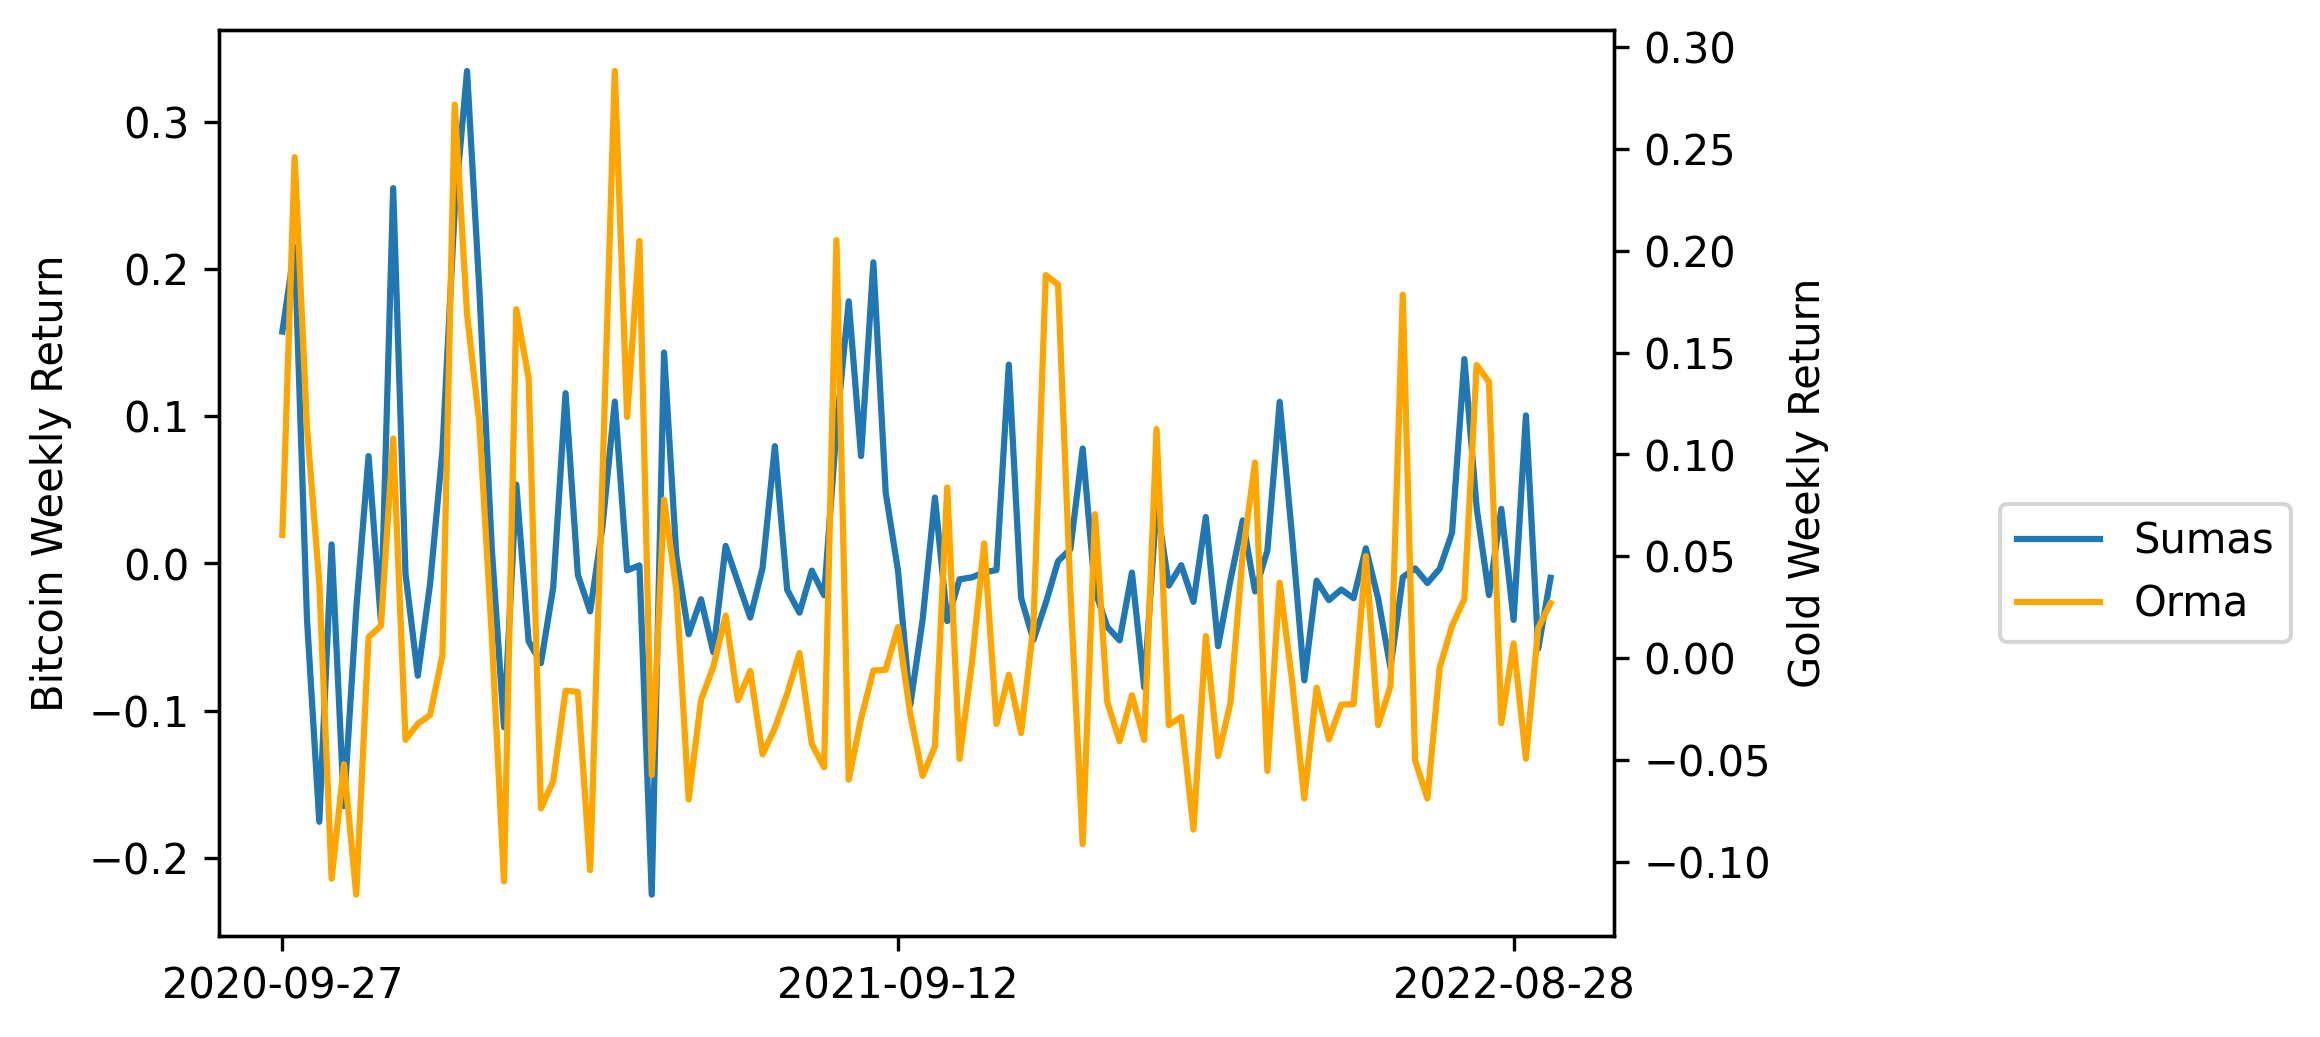

In [19]:
dates = bg_w.index.to_numpy()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(dates,bg_w["S_mreturn"])
curve2 = ax2.plot(dates,bg_w["O_mreturn"],color="orange")

plt.xticks(dates[::50])
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
ax1.set_ylabel('Bitcoin Weekly Return')
ax2.set_ylabel('Gold Weekly Return')
ax1.legend([ax1.get_lines()[0], ax2.get_lines()[0]],\
           ['Sumas','Orma'], bbox_to_anchor=(1.5, 0.5))
plt.show()

In [20]:
cwdata = bg_w[["S_mreturn","O_mreturn"]]
cwdata.head(5)

,S_mreturn,O_mreturn
Date,,
2020-09-27,0.157531,0.060465
2020-10-04,0.214965,0.245987
2020-10-11,-0.037880,0.113241
2020-10-18,-0.175448,0.037002
2020-10-25,0.012930,-0.108343


In [21]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests

grangercausalitytests(cwdata,5,addconst=True,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1171  , p=0.7329  , df_denom=100, df_num=1
ssr based chi2 test:   chi2=0.1206  , p=0.7283  , df=1
likelihood ratio test: chi2=0.1206  , p=0.7284  , df=1
parameter F test:         F=0.1171  , p=0.7329  , df_denom=100, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1787  , p=0.8366  , df_denom=97, df_num=2
ssr based chi2 test:   chi2=0.3759  , p=0.8287  , df=2
likelihood ratio test: chi2=0.3752  , p=0.8289  , df=2
parameter F test:         F=0.1787  , p=0.8366  , df_denom=97, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1329  , p=0.9403  , df_denom=94, df_num=3
ssr based chi2 test:   chi2=0.4283  , p=0.9343  , df=3
likelihood ratio test: chi2=0.4274  , p=0.9345  , df=3
parameter F test:         F=0.1329  , p=0.9403  , df_denom=94, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1545  , p=0.9605  , df

{1: ({'ssr_ftest': (0.11712932336120112, 0.7328873264138718, 100.0, 1),
   'ssr_chi2test': (0.12064320306203714, 0.7283379283316024, 1),
   'lrtest': (0.12057260390110969, 0.7284142823771632, 1),
   'params_ftest': (0.11712932336120056, 0.7328873264138718, 100.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.1787356832049128, 0.8366017356432077, 97.0, 2),
   'ssr_chi2test': (0.3758977255031155, 0.828657081392267, 2),
   'lrtest': (0.3752067798839107, 0.8289434093387847, 2),
   'params_ftest': (0.17873568320490932, 0.8366017356432077, 97.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.13287393153955077, 0.940266304288125, 94.0, 3),
   'ssr_chi2test': (0.4283063963455732, 0.9343349379320283, 3),
   'lrtest': (0.4274008053013745, 0.934525739754048, 3),
   'params_ftest': (0.13287393153954885, 0.940266304288125, 94.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [22]:
smor["orma_4mago"] = smor.shift(120)["orma"]
smor = smor.dropna()
smor

,Date,SUMAS.IS,ORMA.IS,orma,orma_4mago
122,2021-03-04,66.92,19.80,19.80,10.40
123,2021-03-05,69.64,20.02,20.02,10.44
124,2021-03-08,69.83,20.90,20.90,9.66
125,2021-03-09,68.09,20.50,20.50,9.92
126,2021-03-10,68.09,20.00,20.00,9.77
...,...,...,...,...,...
518,2022-09-09,74.90,36.54,36.54,28.88
519,2022-09-12,76.00,37.88,37.88,28.90
520,2022-09-13,76.00,37.90,37.90,29.52
521,2022-09-14,73.00,36.50,36.50,28.00


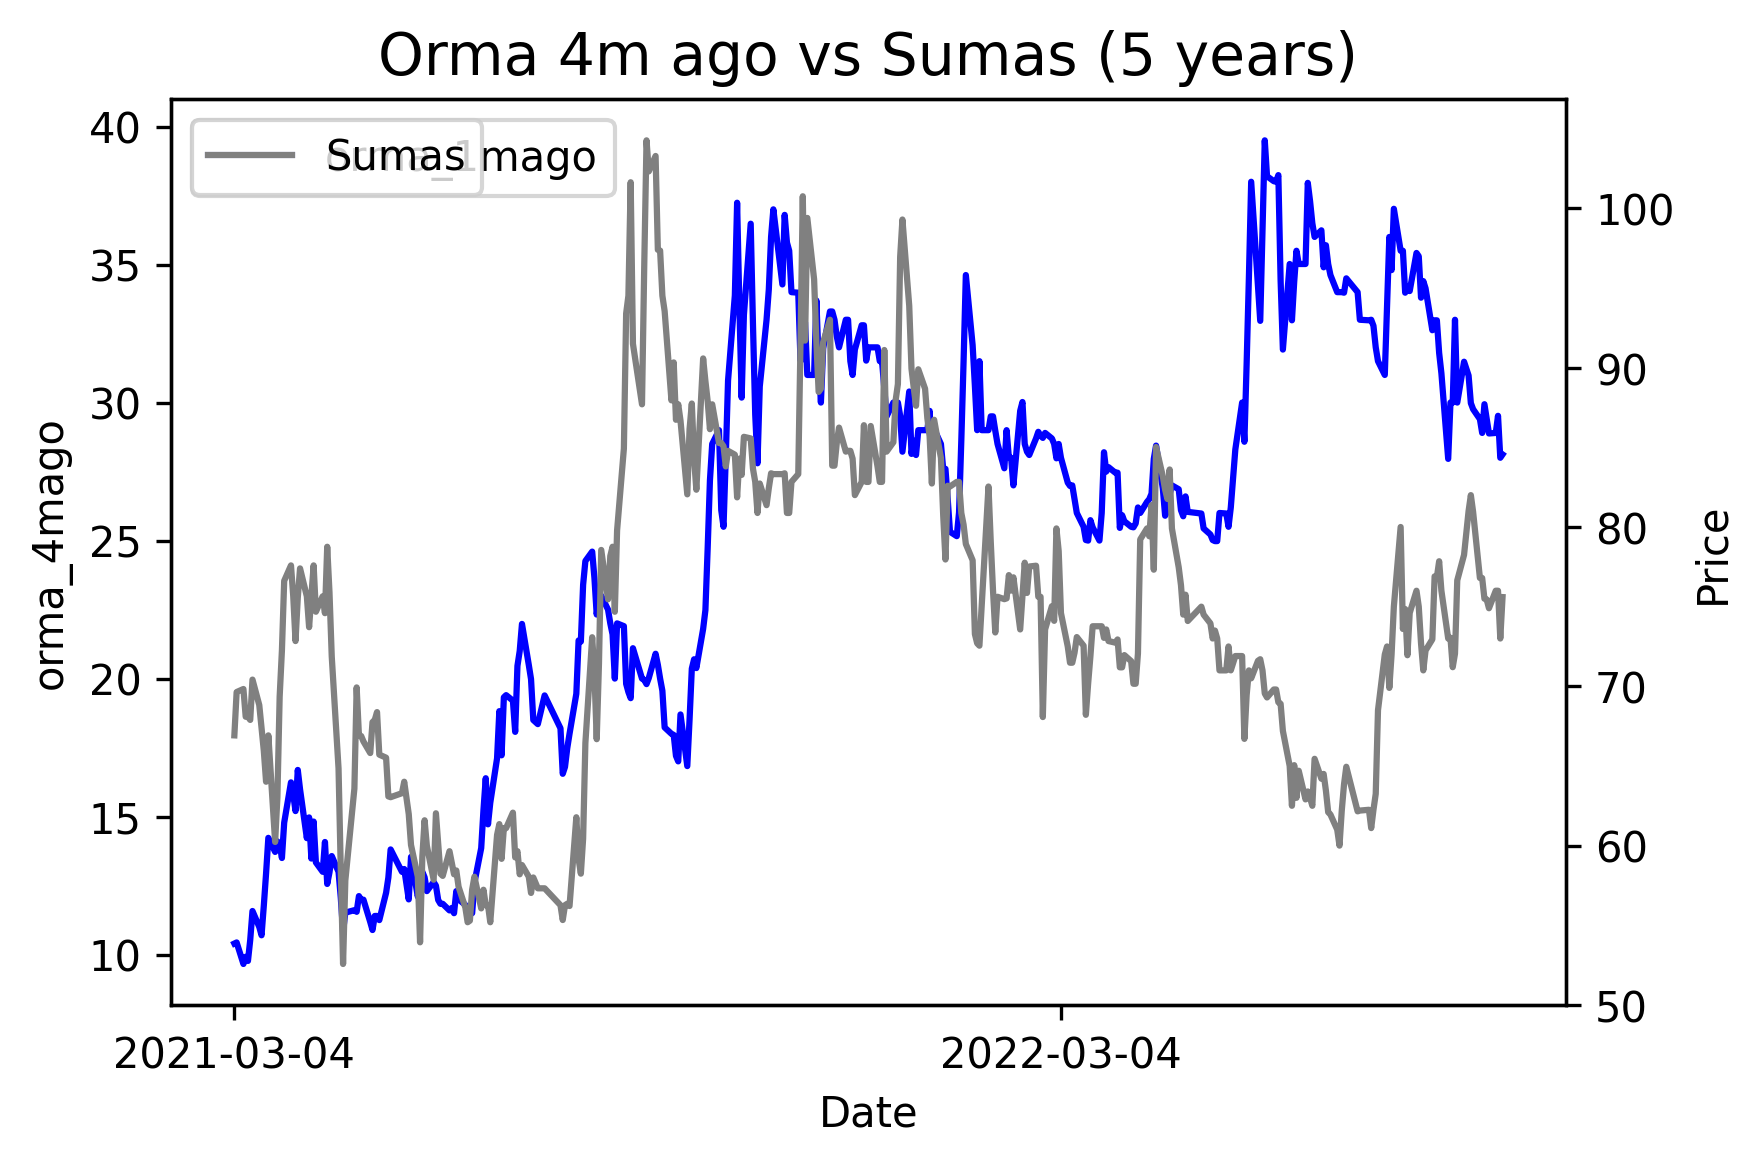

In [23]:
dates = smor.Date.to_numpy()
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
l1 = sns.lineplot(x = smor['Date'], y = smor['orma_4mago'], color='blue',label = "orma_1mago")
ax2 = plt.twinx()
l2 = sns.lineplot(x = smor['Date'], y = smor['SUMAS.IS'], color='gray',label = 'Sumas')
plt.legend(['Sumas','Orma'],loc=2)  # top left
plt.title('Orma 4m ago vs Sumas (5 years)', fontsize=14)
plt.xlabel('')
plt.ylabel('Price')  
plt.xticks(dates[::250])
plt.show()

In [24]:
perf_y = 8
perf_d = perf_y * 12 * 30

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
#    - head(-1)    - all rows except last
df_plot = df[symbols].head(-1).tail(perf_d)
df_plot['YR'] = df["Date"].head(-1).tail(perf_d)

#  set up the subplot
c = 1                         # columns for subplot
r = int((len(symbols)+1)/c)   # rows for subplot
s = 1                         # initialize subplot counter
fig_y = (c+r)*3               # multiple may need to be modified

#  figure size
plt.figure(figsize=(10, fig_y))

#  subplot loop
for i in symbols:
    if i != 'SUMAS.IS':
        plt.subplot(r,c,s)
        l1 = sns.lineplot(x = df_plot['YR'], y = df_plot[i], color='blue',label = i)
        ax2 = plt.twinx()
        l2 = sns.lineplot(x = df_plot['YR'], y = df_plot['SUMAS.IS'], color='gray',label = 'SUMAS.IS')
        plt.legend(['SUMAS.IS',i],loc=2)  # top left
        plt.title('{} vs SUMAS.IS ({} years)'.format(i,perf_y), fontsize=14)
        plt.xlabel('')
        plt.ylabel('Price')      
        s = s + 1  # increment subplot counter

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:
def cor(start,end):
    dataset = Y[start:end]
    correlation = dataset.corr()
    plt.figure(figsize=(15,15))
    plt.title('Correlation Matrix')
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="coolwarm")

In [26]:
import matplotlib.dates as mdate
dfs = yf_price.copy()
def sp(start,end,instance):
    periods = dict(zip(start,end))
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["figure.dpi"] = 300
    for i in periods:
        spc = dfs[i:periods.get(i)][["SUMAS.IS",instance]].reset_index()
        l1 = sns.lineplot(x = spc['Date'], y = spc[instance], color='blue',label = instance)
        ax2 = plt.twinx()
        l2 = sns.lineplot(x = spc['Date'], y = spc['SUMAS.IS'], color='gray',label = 'SUMAS.IS')   
        plt.legend(['SUMAS.IS',instance],loc=2)  # top left
        plt.title('{} vs SUMAS.IS ({} to {})'.format(instance,i,periods.get(i)), fontsize=14)   
        plt.xlabel('')
        plt.ylabel('Price')        
        plt.xticks(rotation=90)
        plt.show()

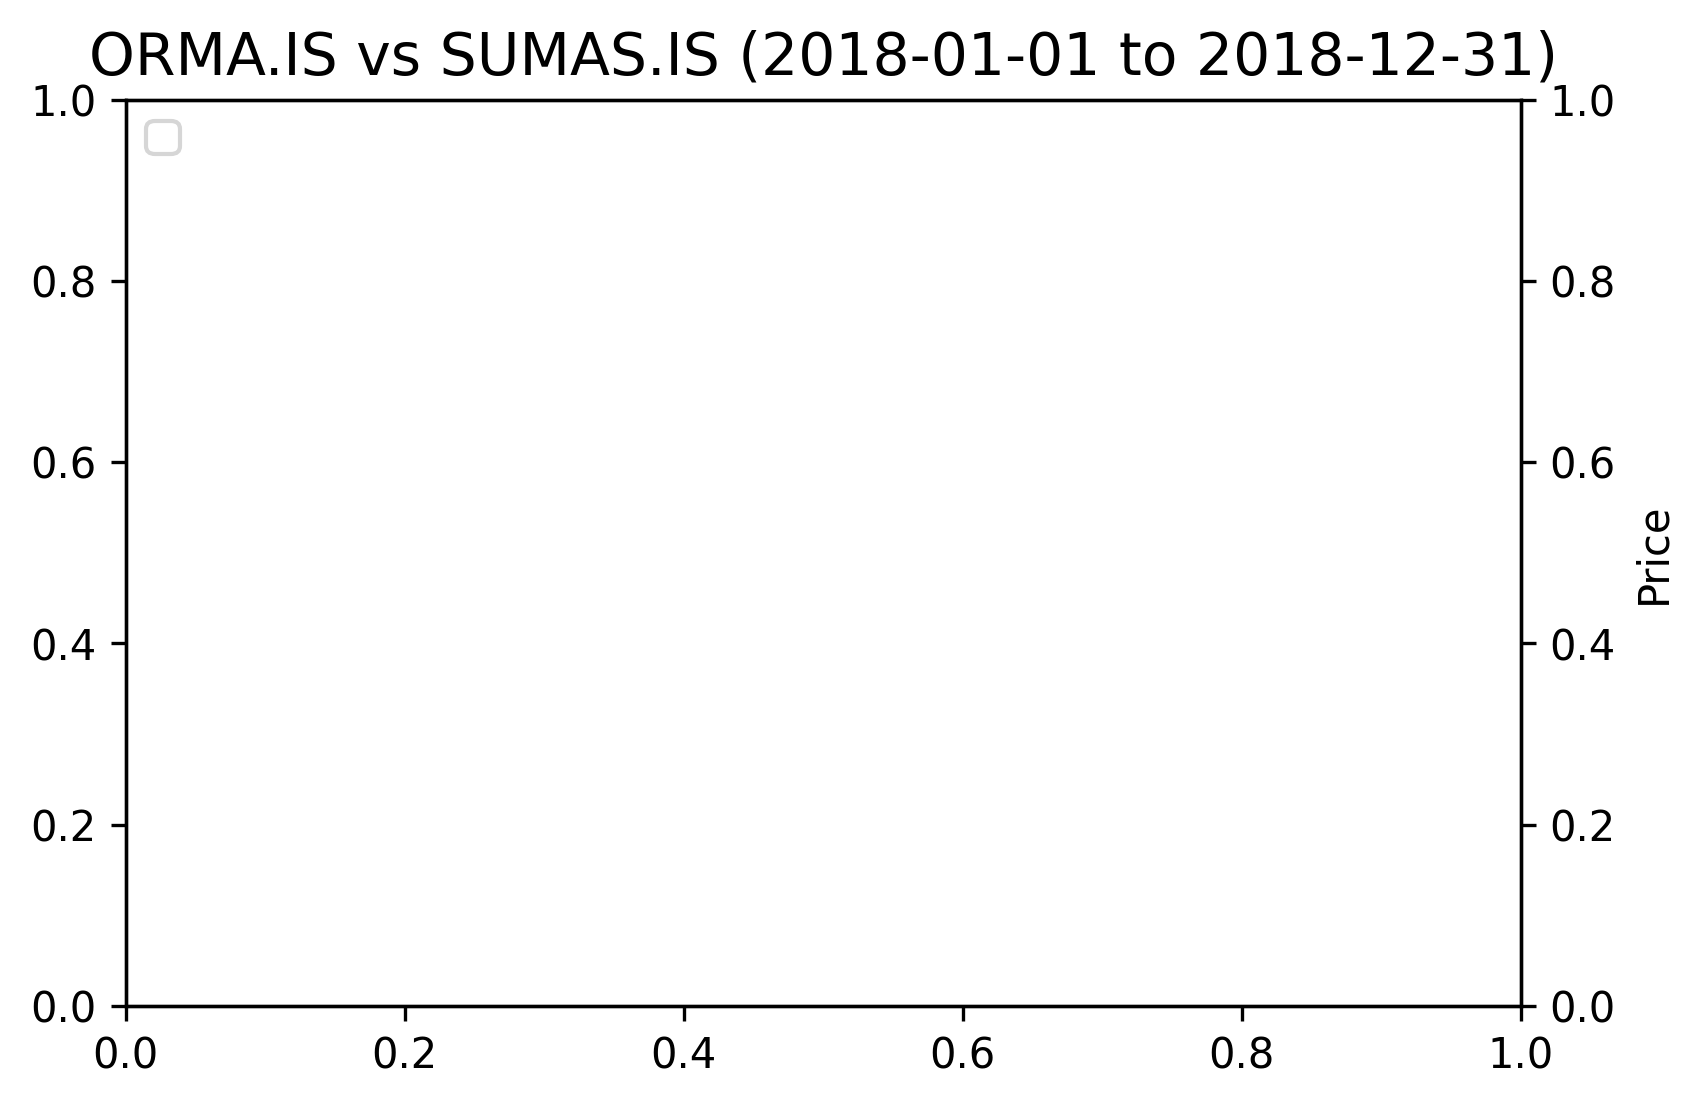

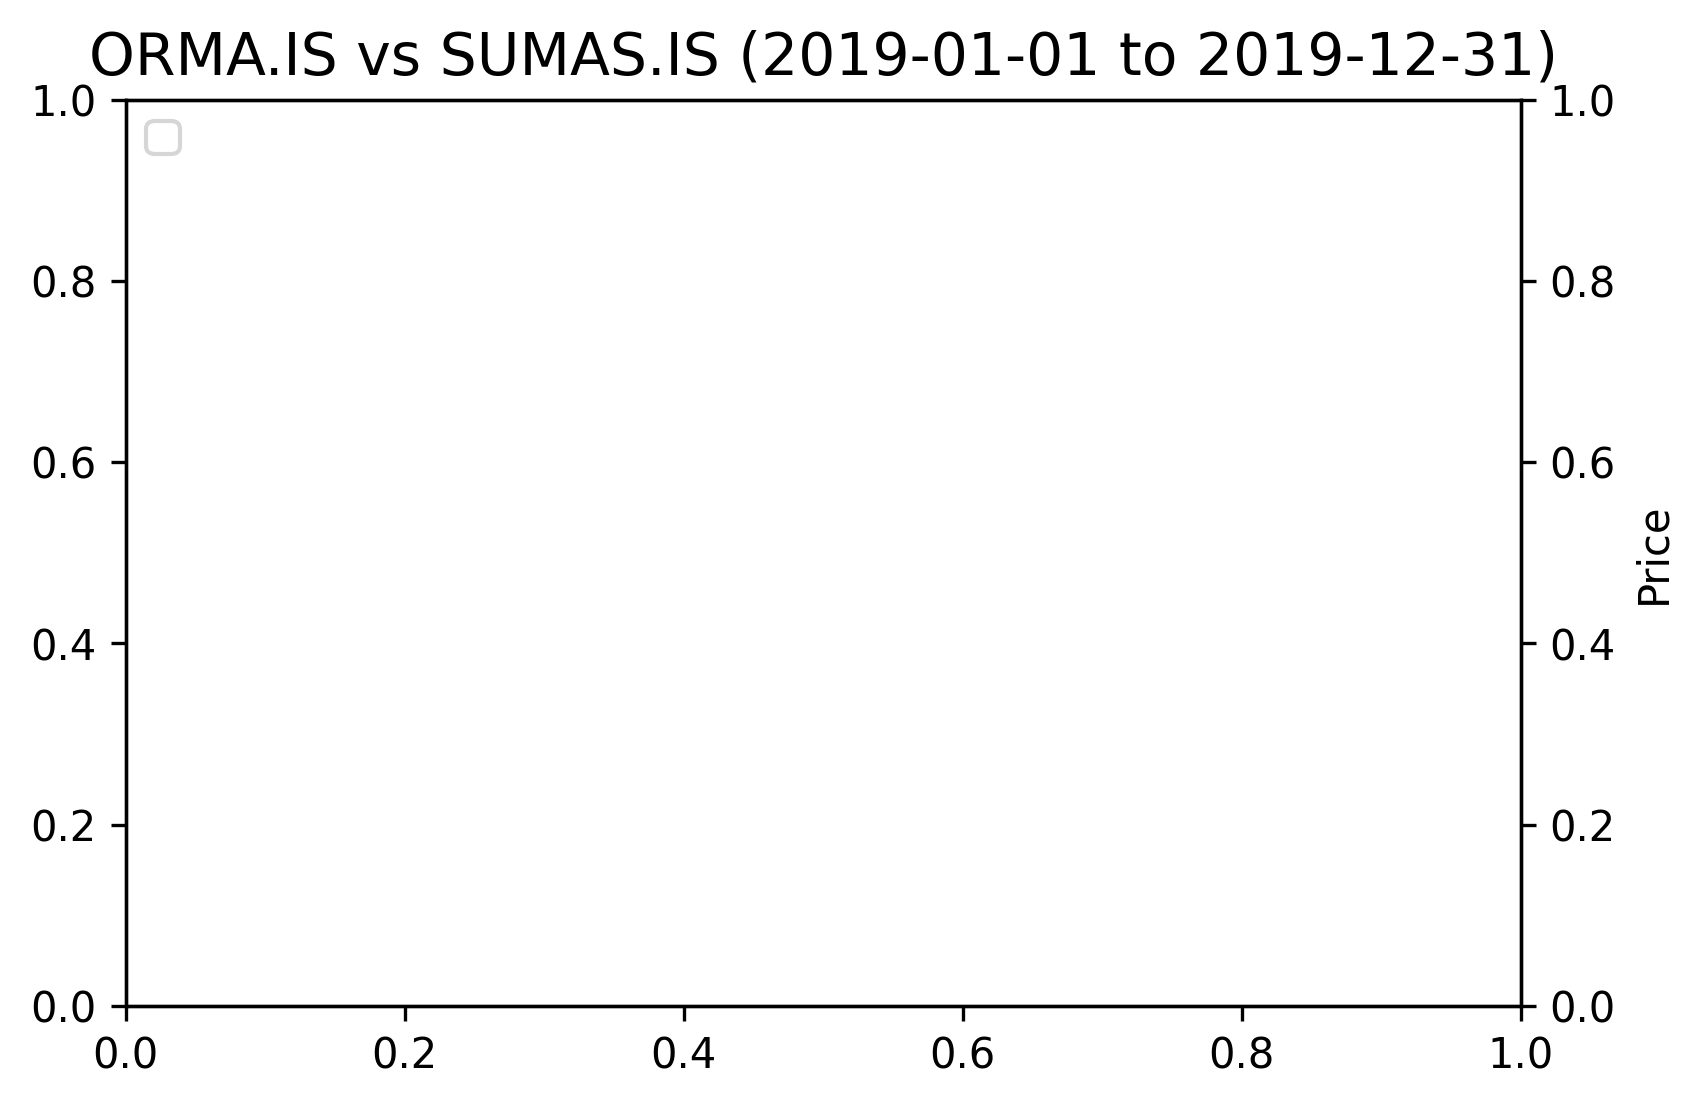

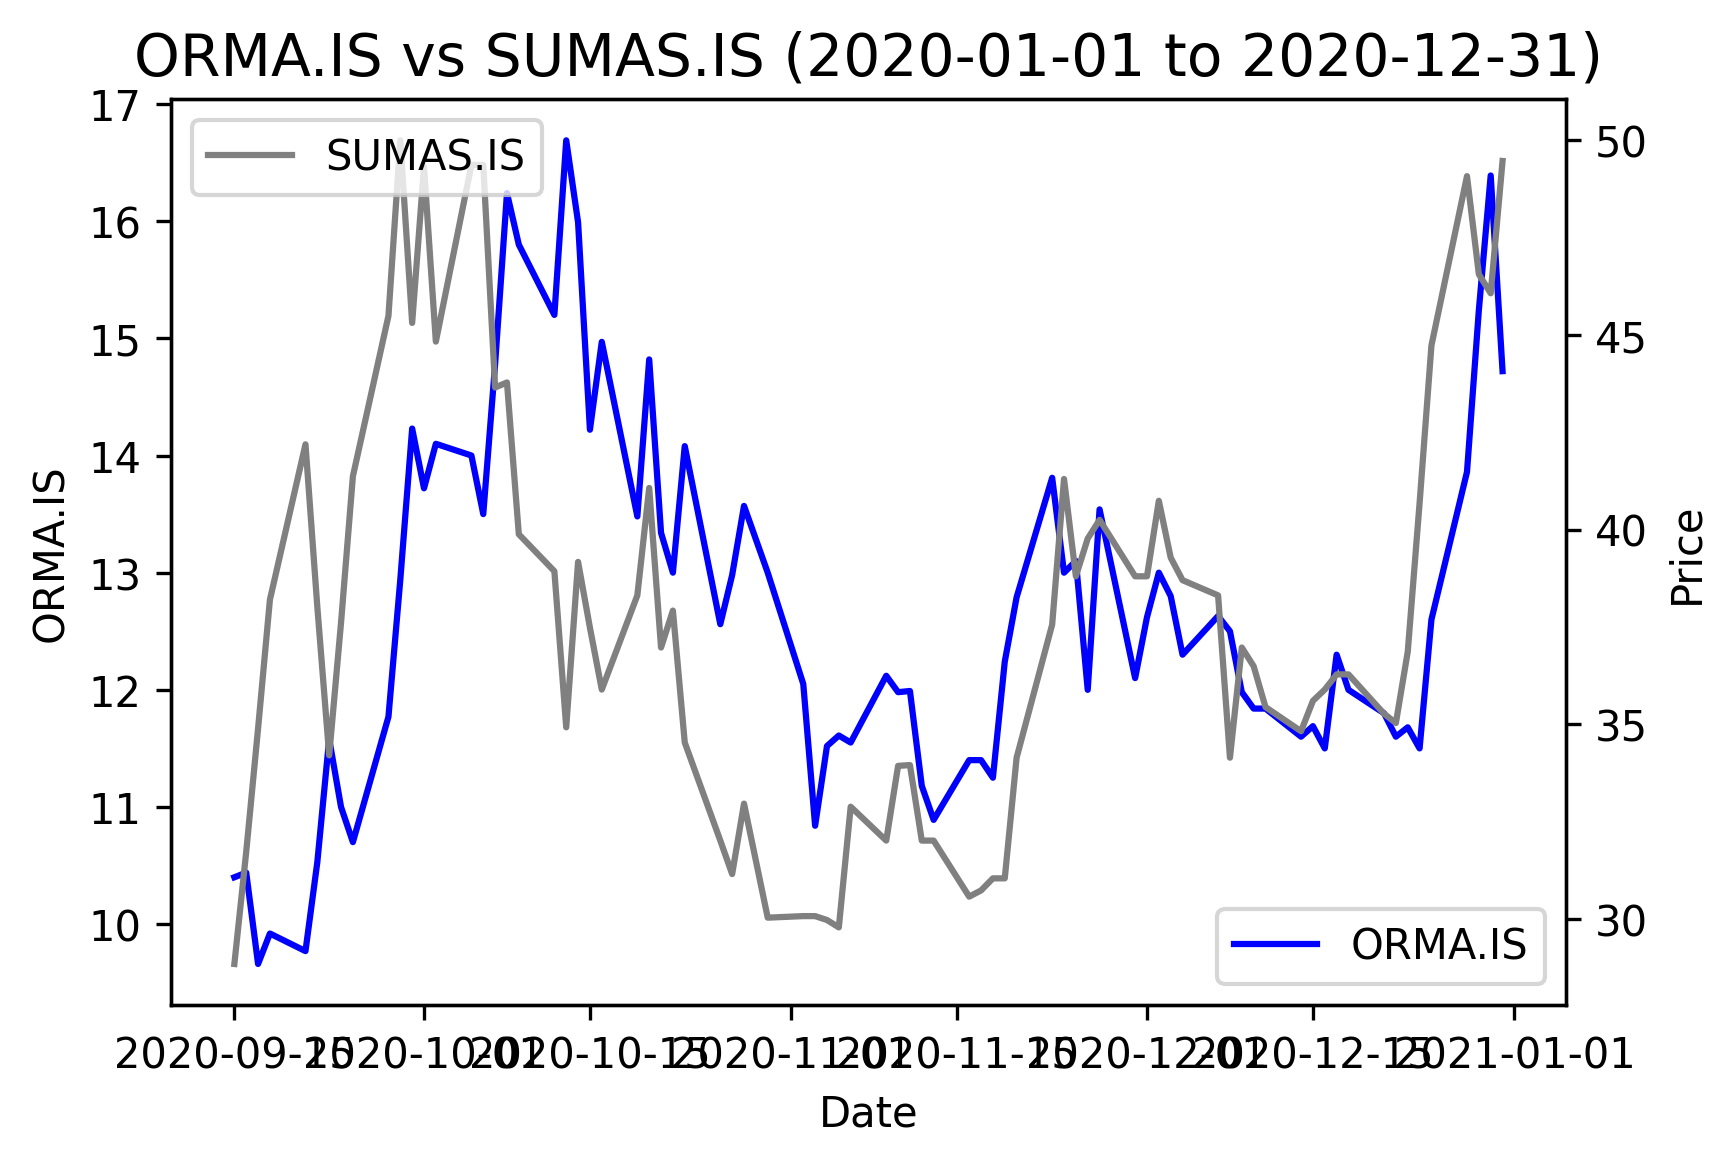

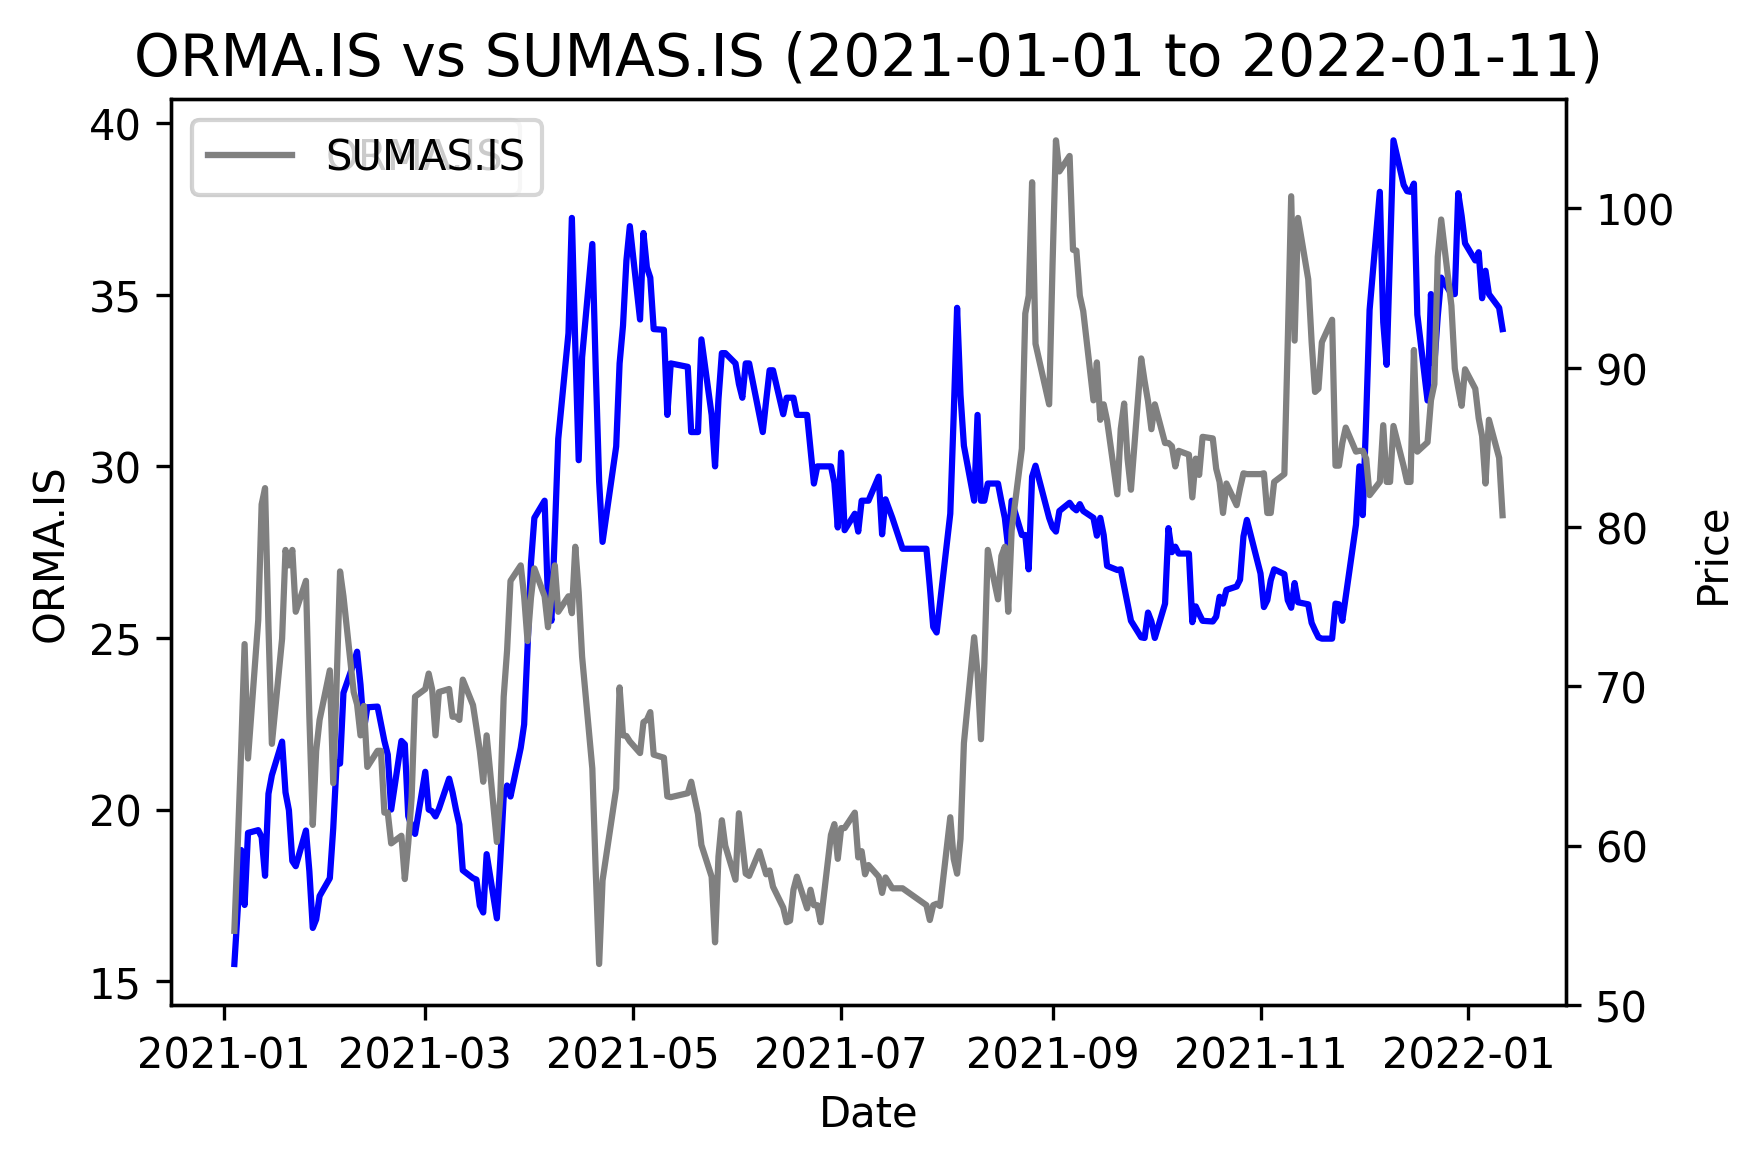

In [27]:
sp(["2018-01-01","2019-01-01","2020-01-01","2021-01-01"],["2018-12-31","2019-12-31","2020-12-31","2022-01-11"],"ORMA.IS")

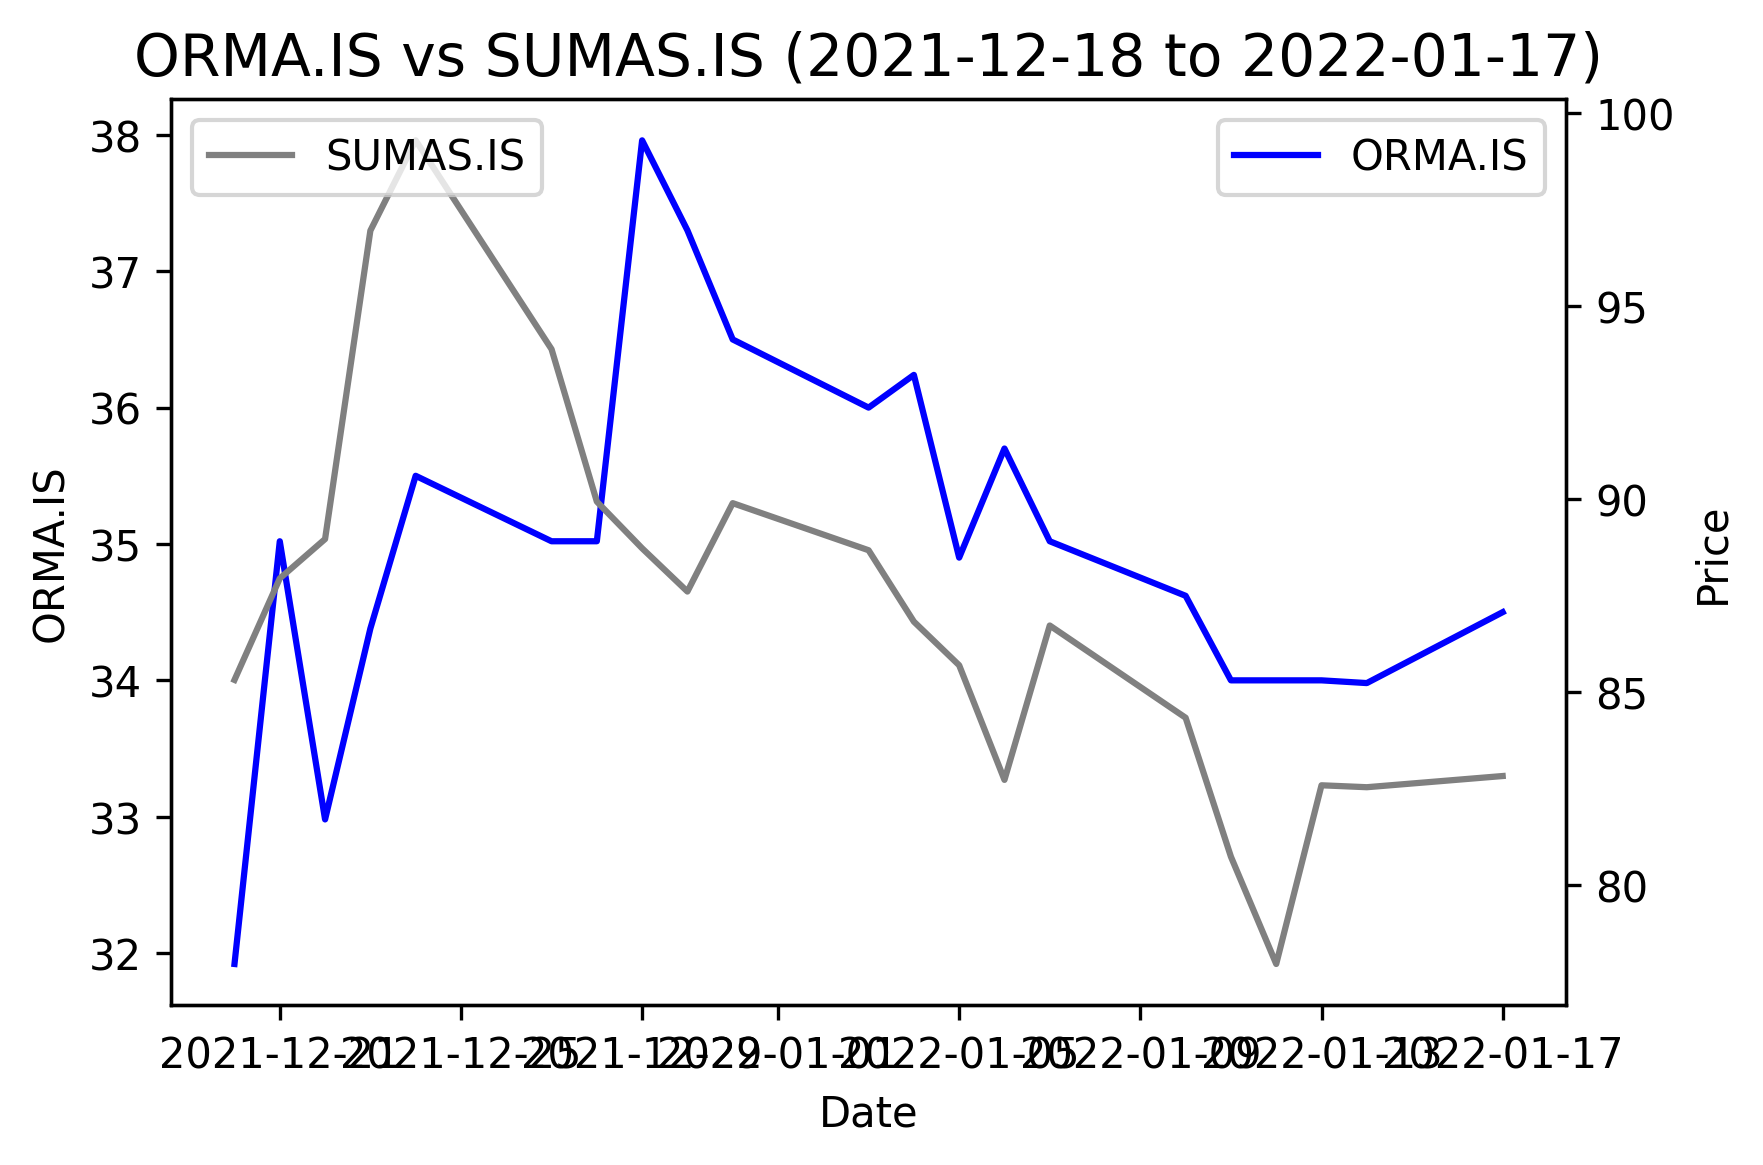

In [28]:
sp(["2021-12-18"],["2022-01-17"],"ORMA.IS")

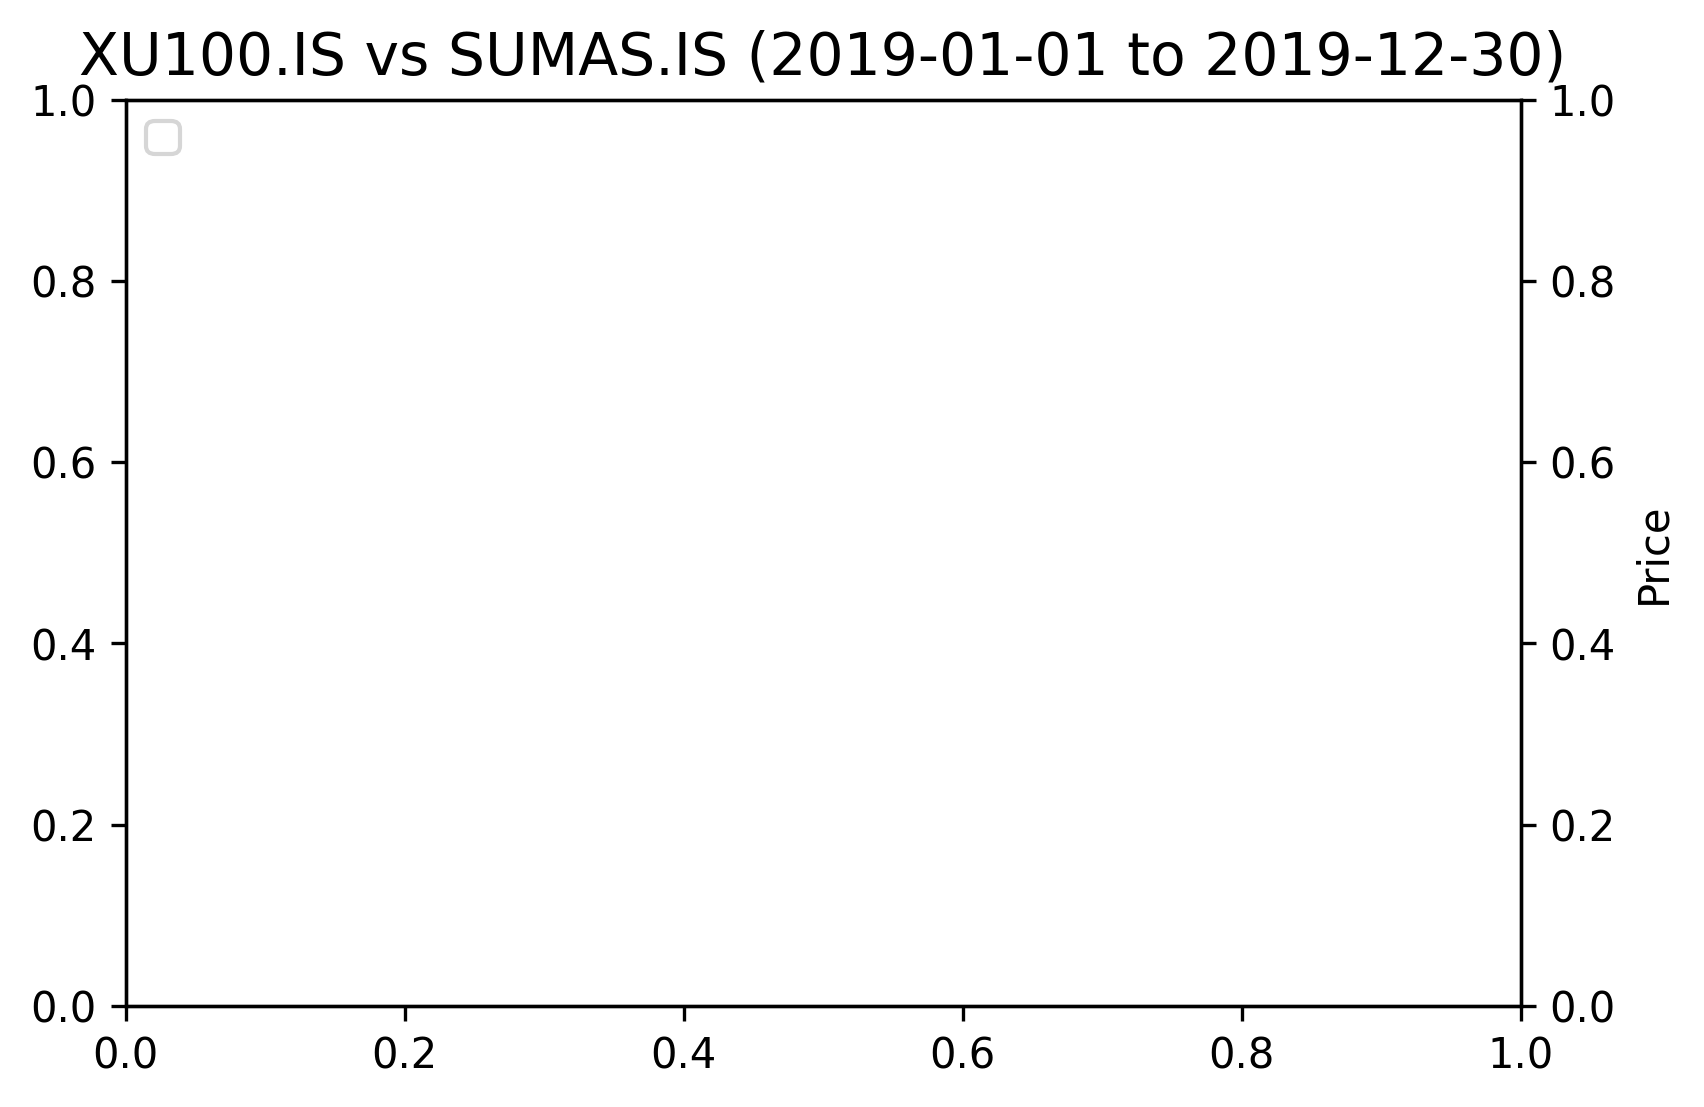

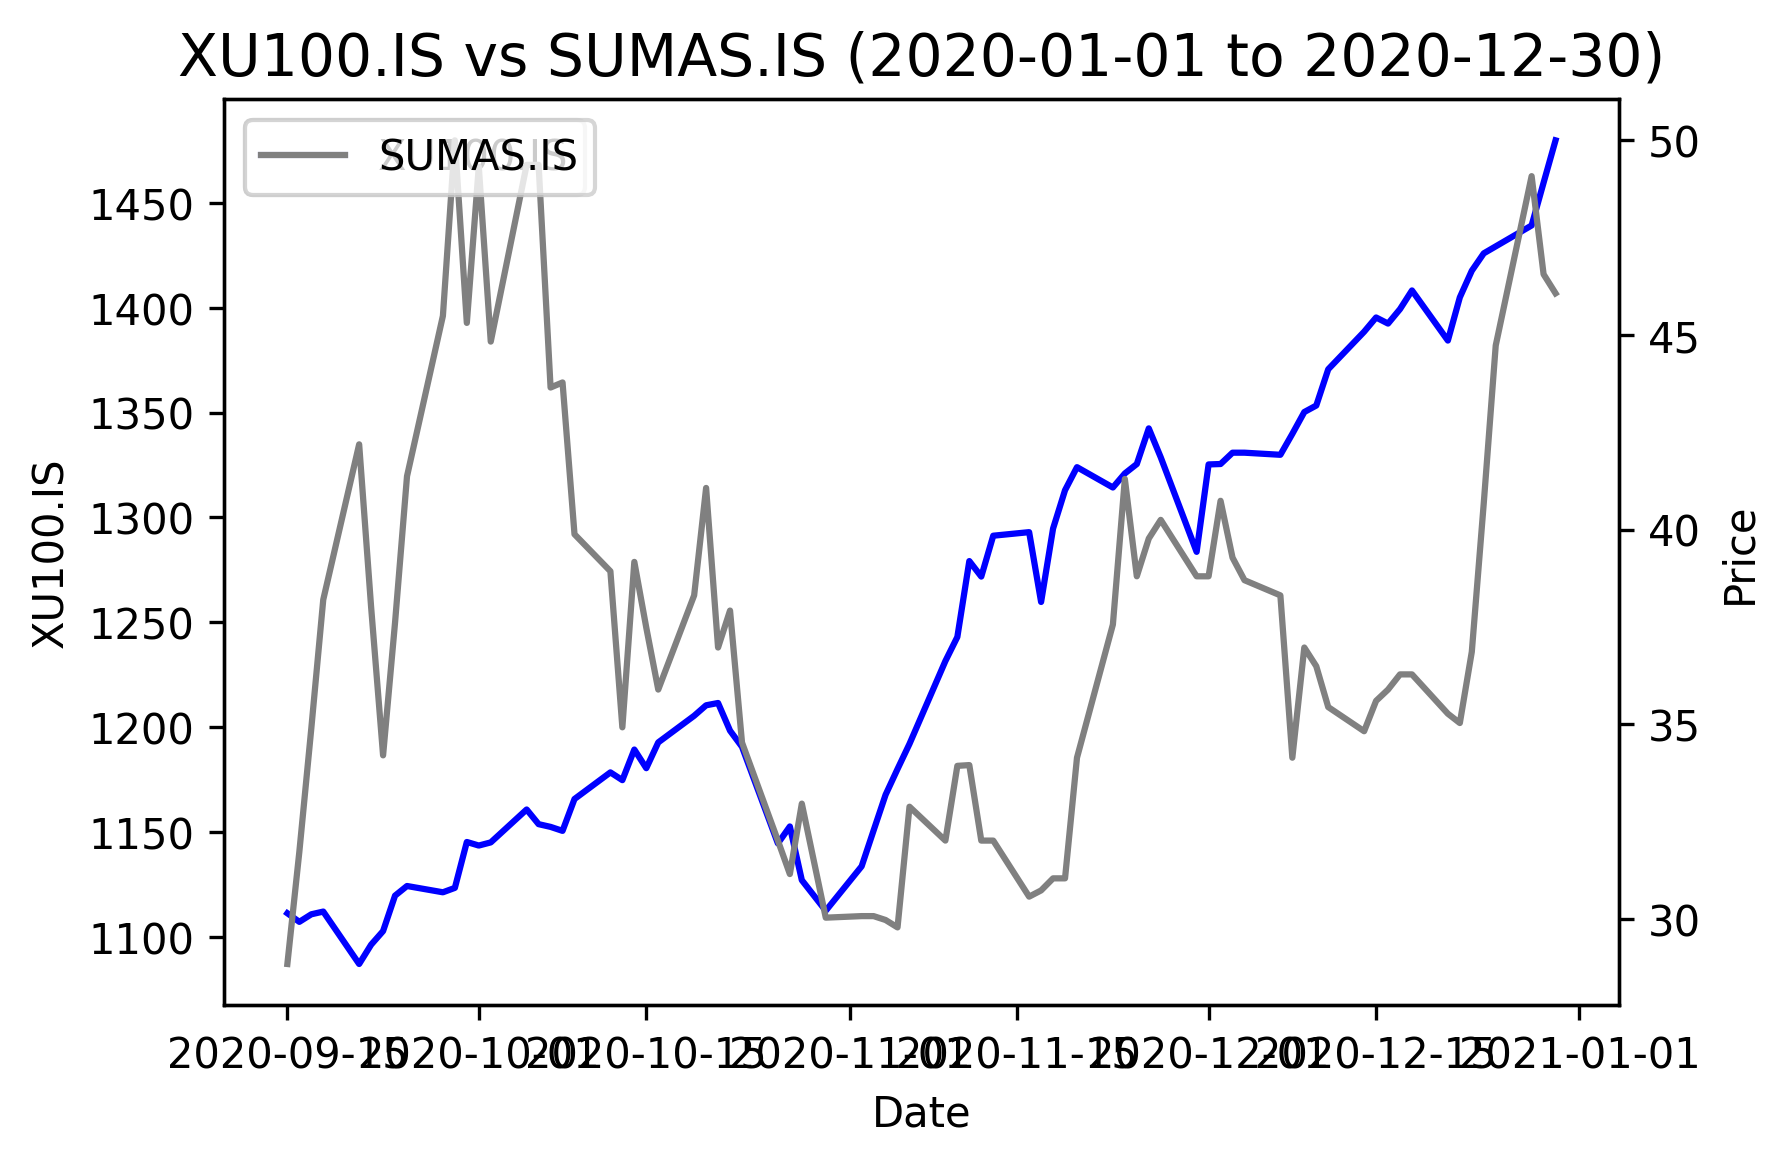

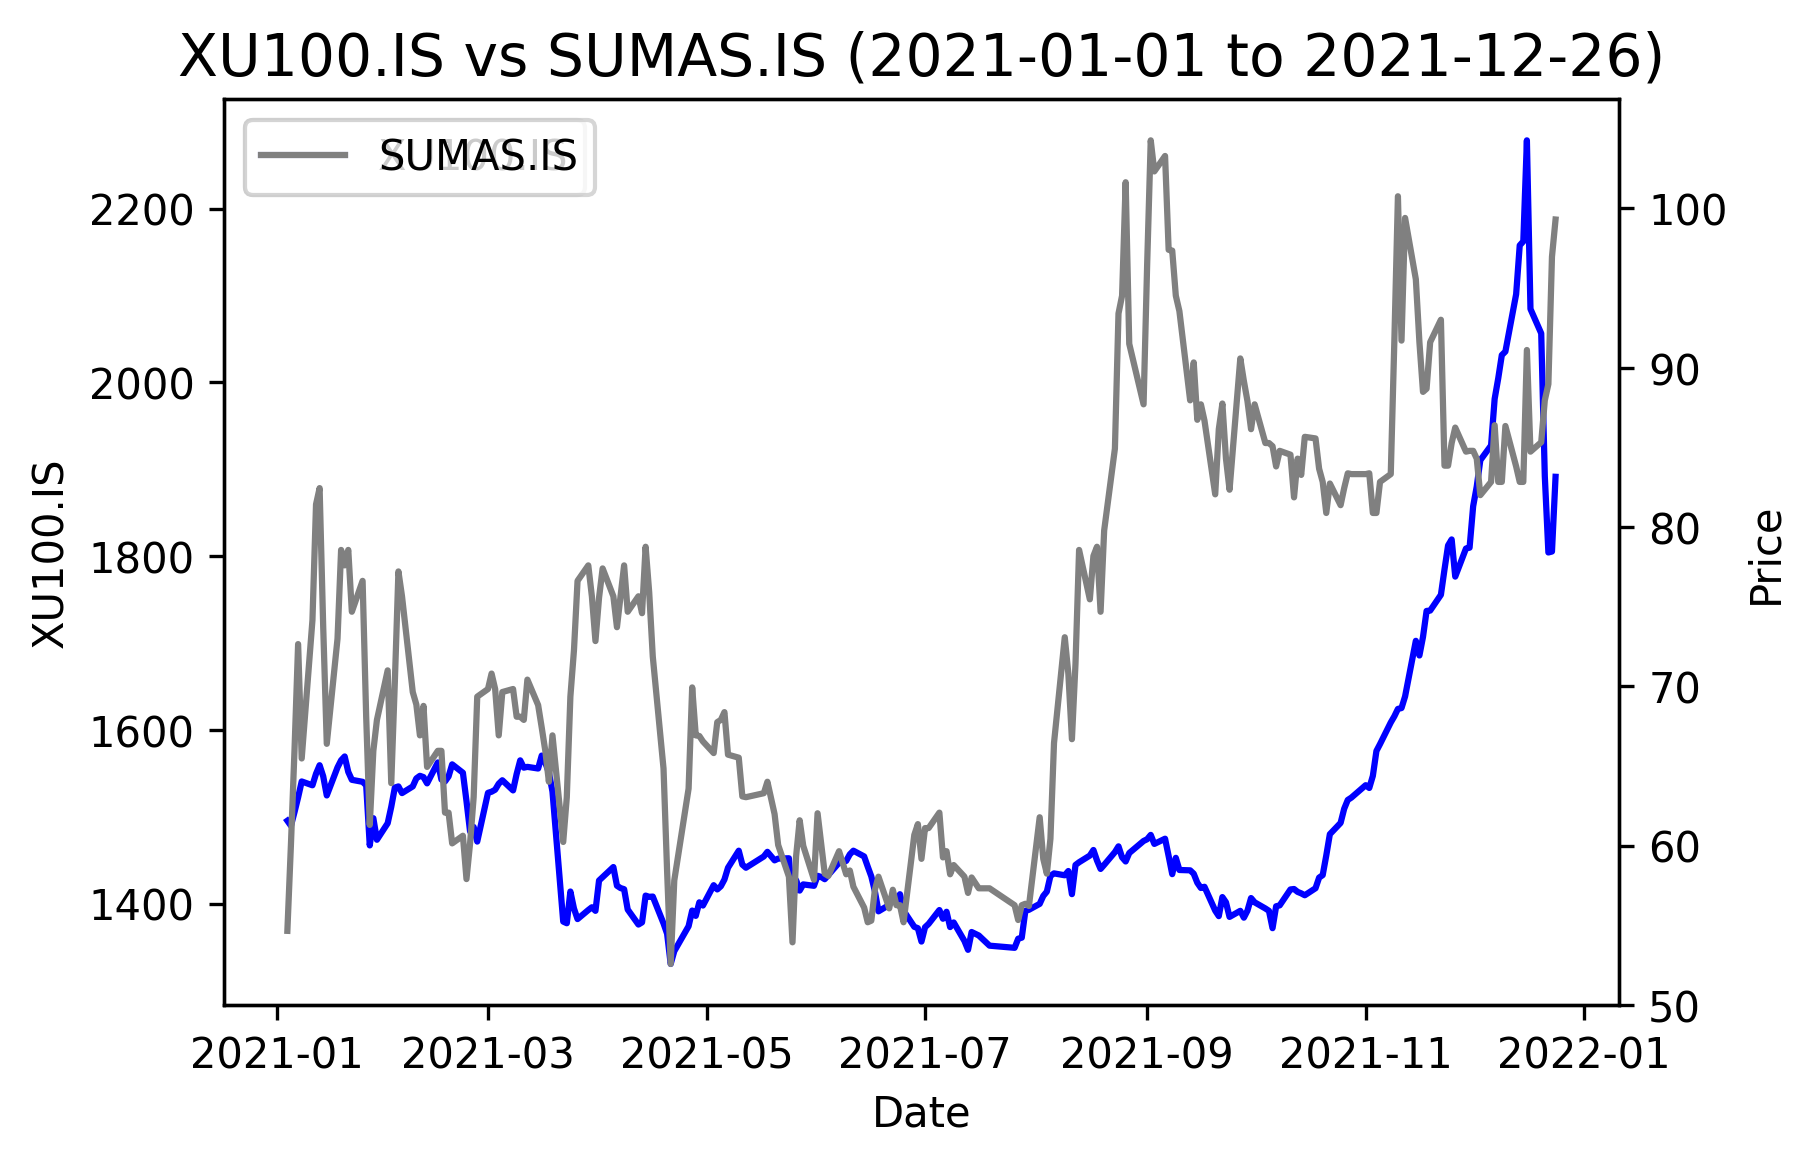

In [29]:
sp(["2019-01-01","2020-01-01","2021-01-01"],["2019-12-30","2020-12-30","2021-12-26"],"XU100.IS")

In [30]:
# Monthly Return
yf_percent = round(yf_price[symbols].pct_change() * 100, 2)
yf_percent.tail(10)

,SUMAS.IS,LBS=F,ORMA.IS,YONGA.IS,XU100.IS,XU030.IS,EURTRY=X,TRY=X,XKAGT.IS,XU050
Date,,,,,,,,,,
2022-09-02,-1.28,-1.18,4.40,-0.23,2.55,2.75,-0.77,0.11,NaN,NaN
2022-09-05,-5.13,0.00,-1.37,-0.39,4.21,5.01,-0.33,0.00,NaN,NaN
2022-09-06,0.00,-0.77,-0.06,-3.80,0.98,0.92,0.39,0.00,NaN,NaN
2022-09-07,-1.69,3.16,-1.94,-1.45,0.34,0.68,-0.44,0.11,NaN,NaN
2022-09-08,-0.07,1.56,3.06,9.98,1.02,1.01,0.94,-0.05,NaN,NaN
2022-09-09,-0.73,-0.86,0.44,-3.05,2.44,2.66,0.27,0.11,NaN,NaN
2022-09-12,1.47,9.02,3.67,9.97,3.63,4.11,0.38,-0.11,NaN,NaN
2022-09-13,0.00,0.92,0.05,-2.37,-6.09,-6.88,0.65,0.00,NaN,NaN
2022-09-14,-3.95,-8.75,-3.69,6.79,0.59,0.51,-1.36,0.16,NaN,NaN


In [31]:
yf_percent['Year'] = pd.to_datetime(yf_percent.index).strftime("%Y")
yf_percent['YR-MTH'] = pd.to_datetime(yf_percent.index).strftime("%Y-%m")

yf_percent.tail(3)

,SUMAS.IS,LBS=F,ORMA.IS,YONGA.IS,XU100.IS,XU030.IS,EURTRY=X,TRY=X,XKAGT.IS,XU050,Year,YR-MTH
Date,,,,,,,,,,,,
2022-09-13,0.00,0.92,0.05,-2.37,-6.09,-6.88,0.65,0.00,NaN,NaN,2022,2022-09
2022-09-14,-3.95,-8.75,-3.69,6.79,0.59,0.51,-1.36,0.16,NaN,NaN,2022,2022-09
2022-09-15,3.56,0.00,-1.92,4.28,0.46,0.36,0.38,0.05,NaN,NaN,2022,2022-09


In [32]:
# create dataframe
perf_mth = pd.DataFrame()   
perf_mth['YR-MTH'] = yf_percent['YR-MTH'].sort_values().unique()


#  calculate returns
for x in symbols:
    perf_mth[x] = yf_percent[x].groupby(yf_percent['YR-MTH']).sum().values
    perf_mth[x] = round(perf_mth[x],2)
perf_mth

,YR-MTH,SUMAS.IS,LBS=F,ORMA.IS,YONGA.IS,XU100.IS,XU030.IS,EURTRY=X,TRY=X,XKAGT.IS,XU050
0,2020-09,50.45,-32.52,34.01,-66.34,3.08,3.40,3.14,4.35,0.0,0.0
1,2020-10,-34.86,-20.44,-3.78,-11.14,-2.74,-4.74,5.66,6.15,0.0,0.0
2,2020-11,28.34,25.97,-3.00,-1.55,14.63,15.63,-3.12,-5.67,0.0,0.0
3,2020-12,27.56,32.11,22.50,1.43,14.16,14.17,-3.20,-5.88,0.0,0.0
4,2021-01,38.92,4.20,21.94,24.93,0.00,-3.76,-1.75,-0.22,0.0,0.0
5,2021-02,5.29,11.85,12.81,-22.70,-0.03,-0.95,0.07,-0.37,0.0,0.0
6,2021-03,6.91,3.94,28.60,-5.77,-4.89,-7.69,9.90,13.61,0.0,0.0
7,2021-04,-5.29,40.35,47.59,-6.20,0.65,1.98,1.80,-1.65,0.0,0.0
8,2021-05,-12.70,-11.29,-9.23,0.07,1.73,3.47,5.14,4.72,0.0,0.0
9,2021-06,3.42,-58.26,-15.04,-10.39,-4.53,-2.92,-0.48,1.94,0.0,0.0


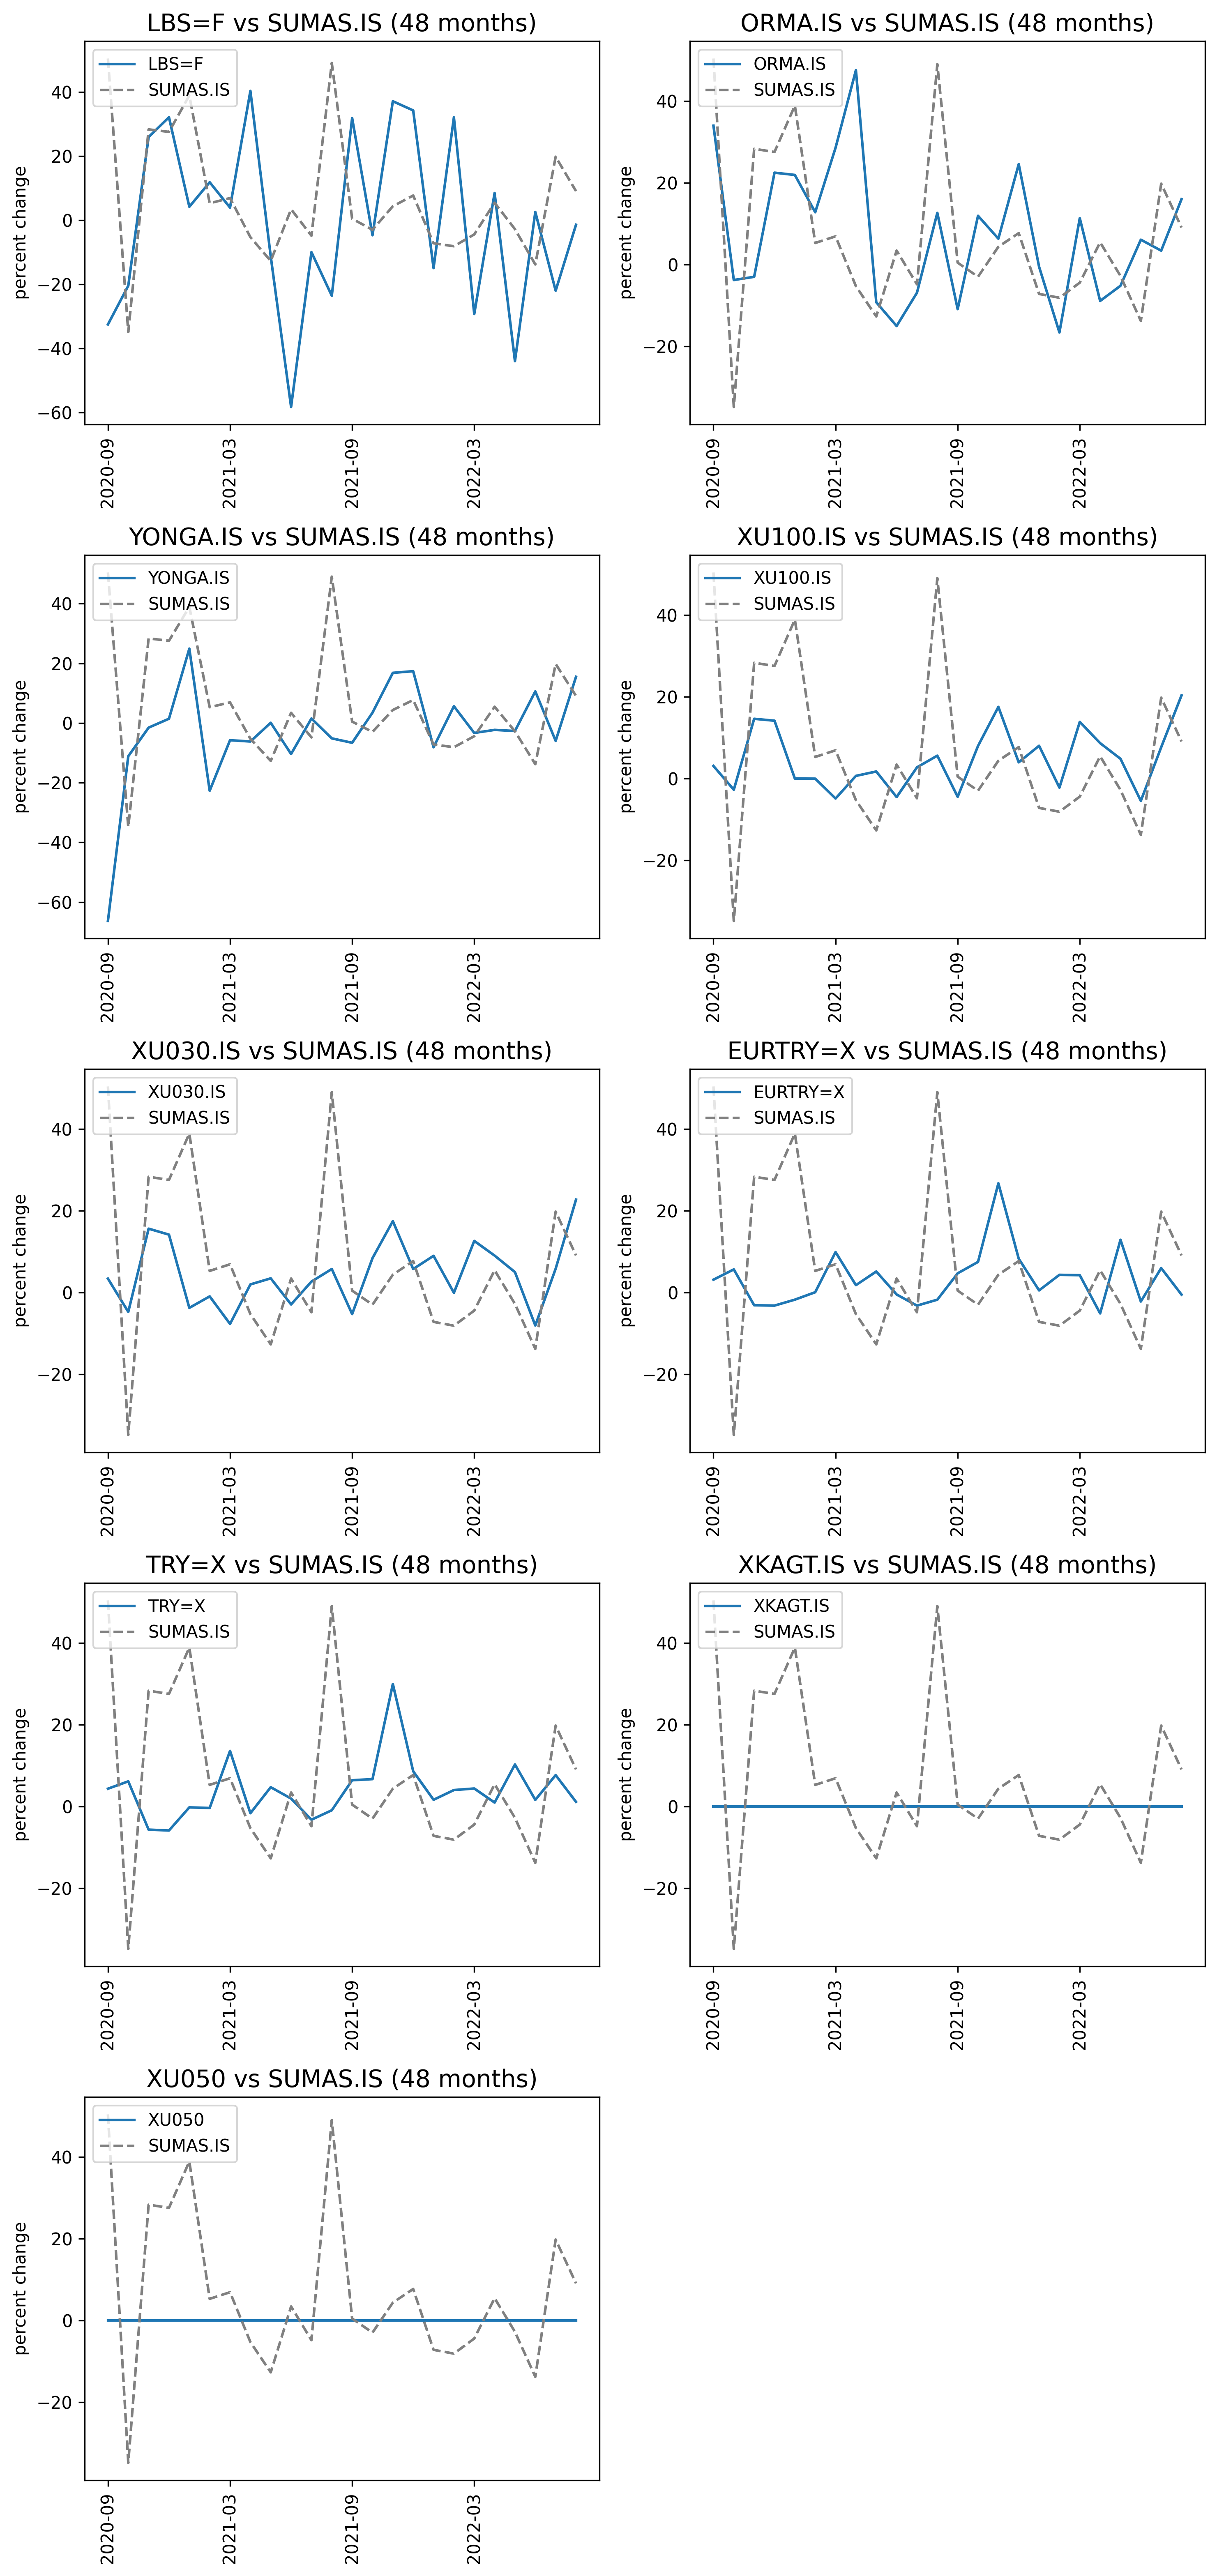

In [33]:
perf_m = 48
plot = perf_mth[symbols].head(-1).tail(perf_m)
plot['YR-MTH'] = perf_mth['YR-MTH'].head(-1).tail(perf_m)


#  set up the subplot
c = 2                         # columns for subplot
r = int((len(symbols)+1)/c)   # rows for subplot
s = 1                         # initialize subplot counter
fig_y = (c+r)*3               # multiple may need to be modified

#  figure size
plt.figure(figsize=(10, fig_y))

#  subplot loop
for i in symbols:
    if i != 'SUMAS.IS':
        plt.subplot(r,c,s)
        sns.lineplot(x = plot['YR-MTH'], y = plot[i])
        sns.lineplot(x = plot['YR-MTH'], y = plot['SUMAS.IS'], color='gray',ls='--')
        plt.legend([i,'SUMAS.IS'],loc=2)  # top left
        plt.title('{} vs SUMAS.IS ({} months)'.format(i,perf_m), fontsize=14)
        plt.xlabel('')
        plt.ylabel('percent change')
        plt.xticks(plot['YR-MTH'][::6],rotation=90)
        s = s + 1  # increment subplot counter

plt.tight_layout()
plt.show()